In [1]:
def clean_image(img):
    """
    To delete name and centercrop
    """
    H,W,_ = img.shape
    img = img[:W,...]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img[W//4:W//4+W//2,W//4:W//4+W//2]
    return img

In [2]:
import matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import cv2
from albumentations import Rotate
from scipy import ndimage
import imutils
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
from skimage.morphology import medial_axis, skeletonize, thin, remove_small_objects

In [4]:
# img_path = sorted(glob.glob('centered_imgs/*/*'))
img_path = sorted(glob.glob('FAZ-master/FAZ_Tortuosity/*')) #Original Folder

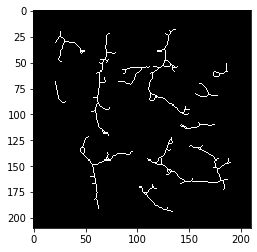

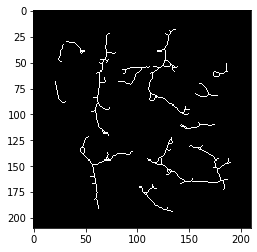

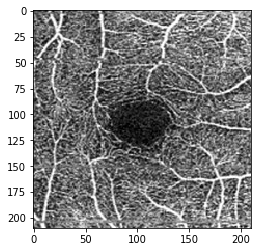

In [5]:
img_orig = clean_image(plt.imread(img_path[2])) 
kernel = np.ones((2,2),np.uint8) #kernel for erosion and dilation

# img_denoise = cv2.fastNlMeansDenoising(img_orig,None,39,7,21) #mean denoising

image = (hessian(img_orig,)*255).astype('uint8') #ridge detection

# image =  cv2.dilate(image,kernel,iterations = 1) #to join disconnected before removing small noise

image = remove_small_objects(image.astype(bool), min_size=64, connectivity=0).astype(float)

image = cv2.dilate(image,kernel,iterations = 1) #to join disconnected 
image = cv2.erode(image,kernel,iterations = 1)  #to join disconnected
image = cv2.dilate(image,kernel,iterations = 1) #to join disconnected
image = cv2.erode(image,kernel,iterations = 1)  #to join disconnected
image = cv2.dilate(image,kernel,iterations = 1) #to join disconnected

#Use any one below
skel = skeletonize(image)
# skel = thin(image)
# med, distance = medial_axis(image, return_distance=True)
# # skel = med*distance

#To get the circular part
mask = np.zeros_like(image, np.uint8)
H,W = image.shape
mask = cv2.circle(mask, (H//2,W//2), H//2, (255,255,255),thickness=-1)
masked_data = cv2.bitwise_and(skel*255, skel*255, mask=mask)

plt.imshow(skel,cmap ='gray')
plt.show()
plt.imshow(masked_data,cmap ='gray')
plt.show()
plt.imshow(img_orig,cmap ='gray')
plt.show()

# Working with segmented images

In [6]:
def get_points(skeleton_image):
    cnts = cv2.findContours(skeleton_image.copy().astype('uint8'), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cnts = imutils.grab_contours(cnts)
    return cnts

In [7]:
contours = get_points(masked_data)

In [8]:
masked_data.shape

(210, 210)

In [9]:
zeros = [np.zeros((210,210)) for _ in range(len(contours))]

In [10]:
i = 0

In [11]:
print(len(contours))

29


In [12]:
for contour in contours:
    for pixel in contour:
        zeros[i][pixel[0,1],pixel[0,0]] = 1
    i+=1

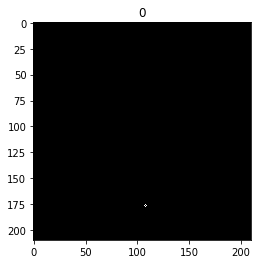

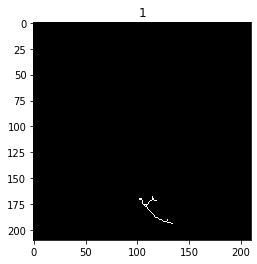

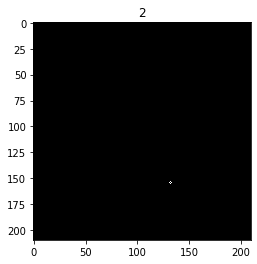

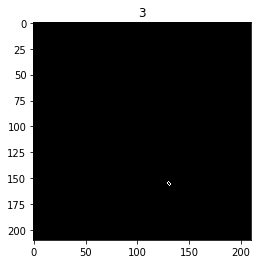

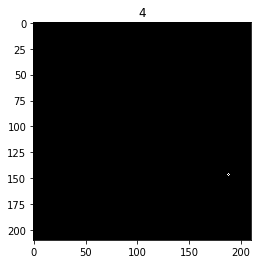

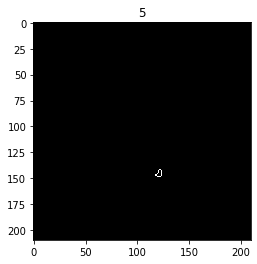

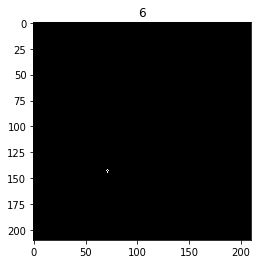

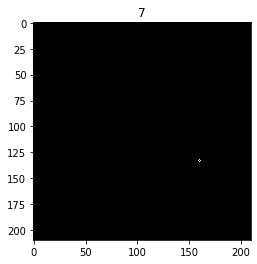

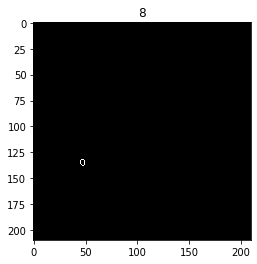

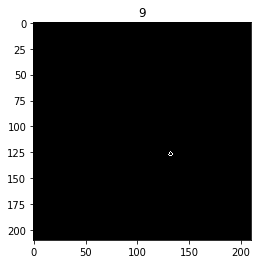

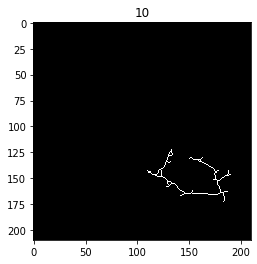

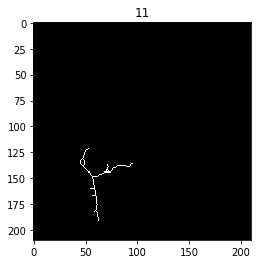

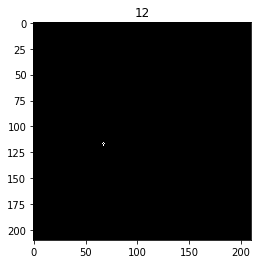

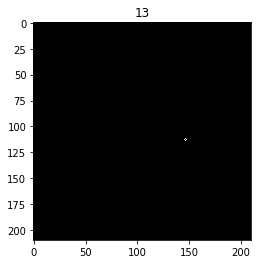

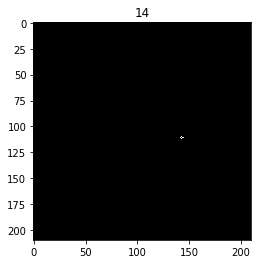

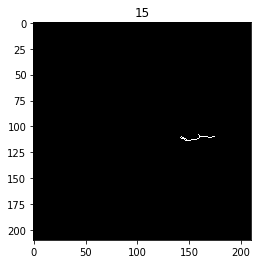

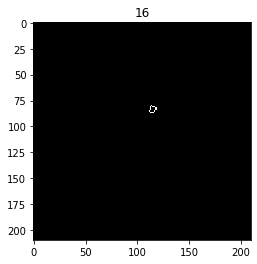

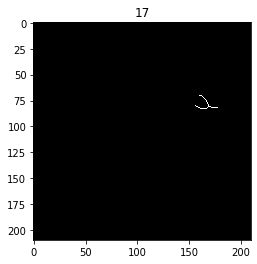

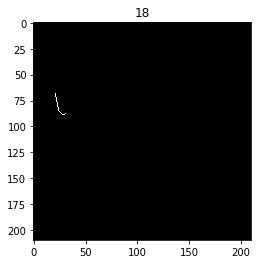

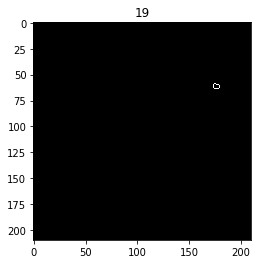

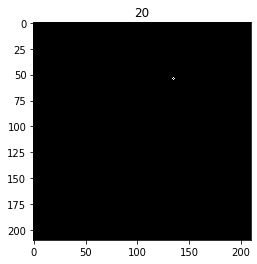

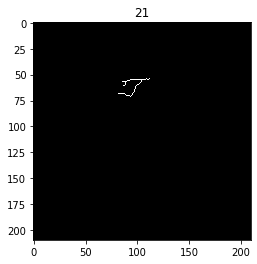

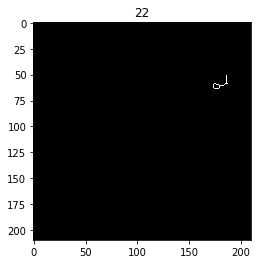

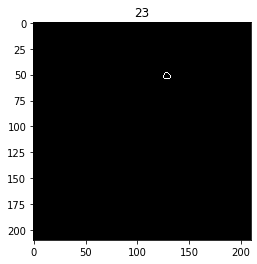

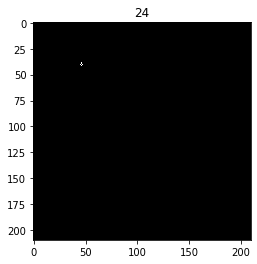

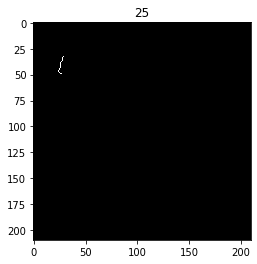

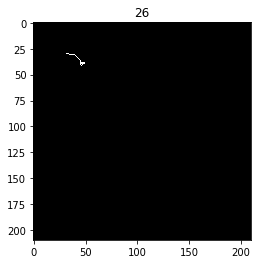

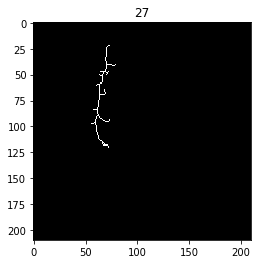

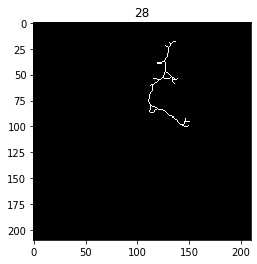

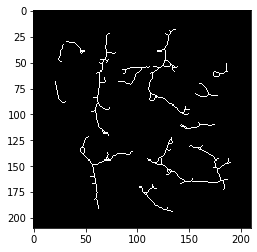

In [13]:
for i in range(len(zeros)):
    plt.title(i)
    plt.imshow(zeros[i],cmap='gray')
    plt.show()
plt.imshow(masked_data,cmap='gray')
plt.show()

In [14]:
contours[10]

array([[[133, 122]],

       [[133, 123]],

       [[132, 124]],

       [[131, 125]],

       [[131, 126]],

       [[130, 127]],

       [[130, 128]],

       [[130, 129]],

       [[129, 130]],

       [[129, 131]],

       [[129, 132]],

       [[128, 133]],

       [[128, 134]],

       [[127, 135]],

       [[127, 136]],

       [[127, 137]],

       [[126, 138]],

       [[126, 139]],

       [[125, 140]],

       [[124, 141]],

       [[123, 141]],

       [[122, 142]],

       [[121, 142]],

       [[120, 143]],

       [[120, 144]],

       [[119, 145]],

       [[118, 146]],

       [[117, 146]],

       [[116, 146]],

       [[115, 146]],

       [[114, 145]],

       [[113, 144]],

       [[112, 144]],

       [[111, 144]],

       [[110, 143]],

       [[111, 144]],

       [[112, 144]],

       [[113, 144]],

       [[114, 145]],

       [[115, 146]],

       [[116, 146]],

       [[117, 146]],

       [[118, 147]],

       [[119, 148]],

       [[120, 148]],

       [[1

# Branching Points

In [85]:
def has_three_n(pixel_m):
    num = 0
    if pixel_m[1][1]==1:
        for i in range(3):
            for j in range(3):
                if pixel_m[i][j]==255:
                    num+=1
        if num>=4:
            return True
    else:
        return False

In [86]:
has_three_n(np.array([[0,0,255],[0,255,0],[255,0,255]]))

False

In [87]:
def branching_points(skeleton_image):
    shape = skeleton_image.shape
    branching_points = []
    for i in range(1,shape[0]-1):
        for j in  range(1,shape[1]-1):
            if has_three_n(np.copy(skeleton_image[i-1:i+2,j-1:j+2])):
                branching_points.append(tuple([i,j]))
    return branching_points

In [18]:
bp = branching_points(masked_data)

In [19]:
zeros2 = np.zeros((210,210))

In [20]:
for x in bp:
    zeros2[x[0],x[1]] = 255

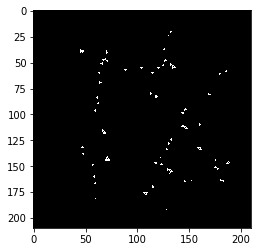

In [21]:
plt.imshow(zeros2,cmap='gray')

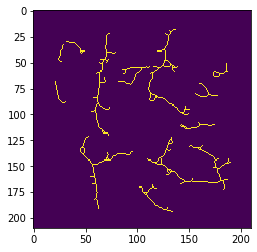

In [22]:
plt.imshow(masked_data)

In [23]:
new = 0.8*zeros2 + 0.2*masked_data

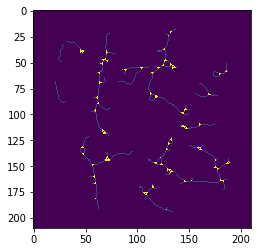

In [24]:
plt.imshow(new)

# Particular contour: Chain Code

In [25]:
contours[10][30:50]

array([[[114, 145]],

       [[113, 144]],

       [[112, 144]],

       [[111, 144]],

       [[110, 143]],

       [[111, 144]],

       [[112, 144]],

       [[113, 144]],

       [[114, 145]],

       [[115, 146]],

       [[116, 146]],

       [[117, 146]],

       [[118, 147]],

       [[119, 148]],

       [[120, 148]],

       [[121, 148]],

       [[122, 148]],

       [[123, 148]],

       [[124, 148]],

       [[125, 149]]], dtype=int32)

In [26]:
zeros = np.zeros((210,210))

In [27]:
i=0

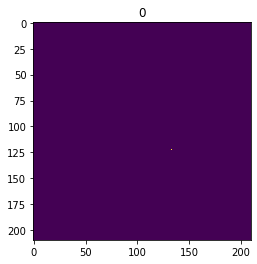

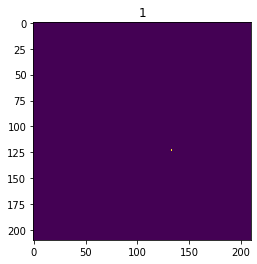

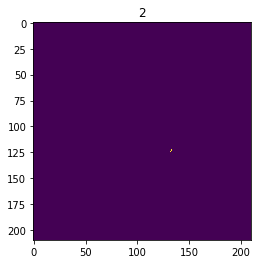

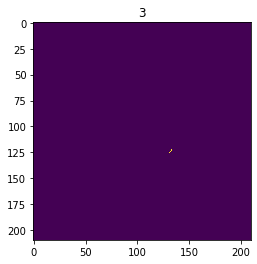

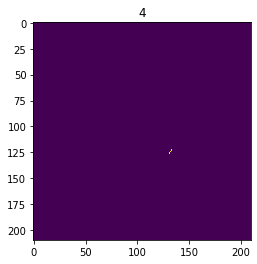

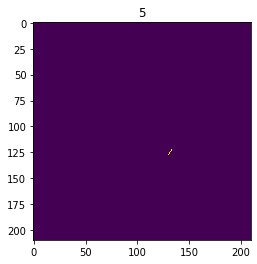

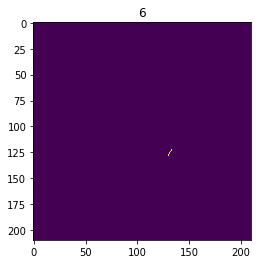

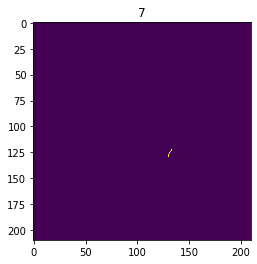

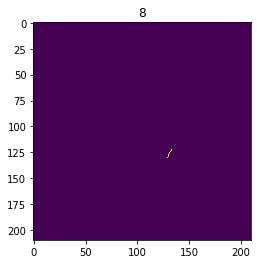

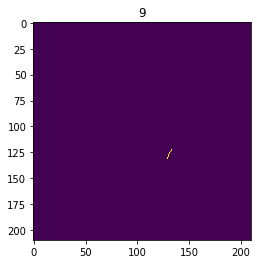

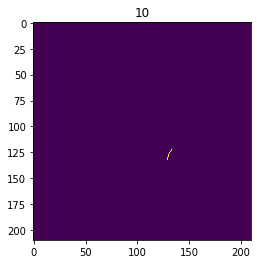

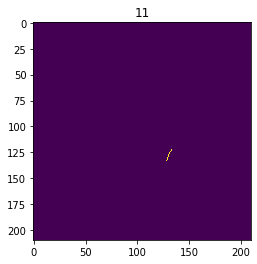

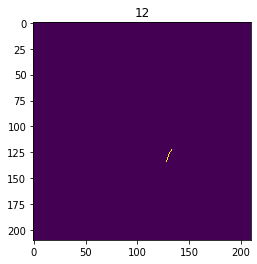

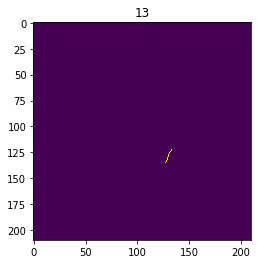

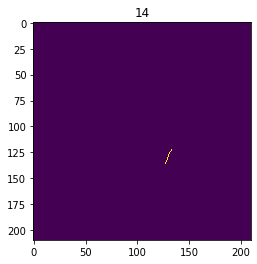

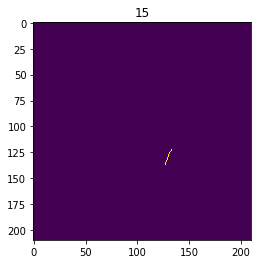

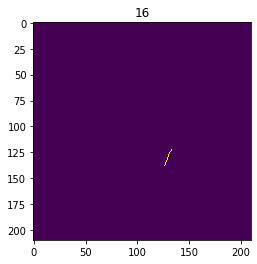

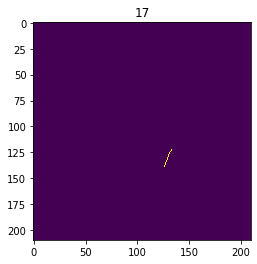

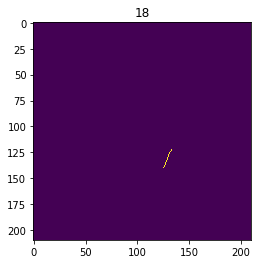

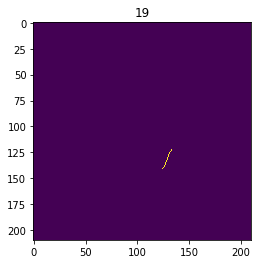

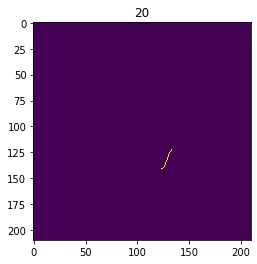

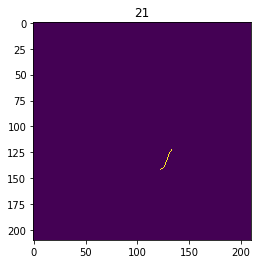

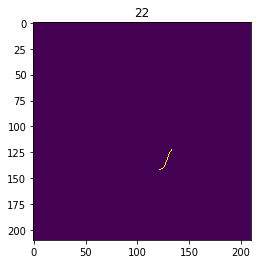

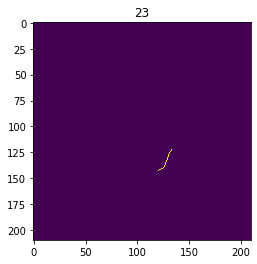

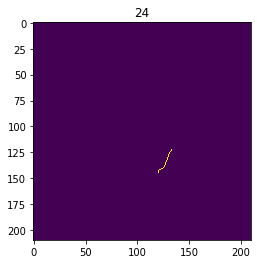

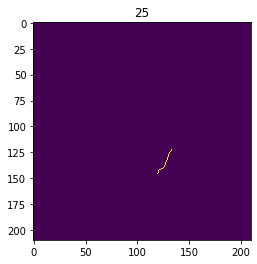

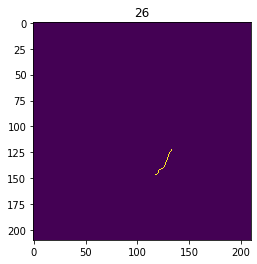

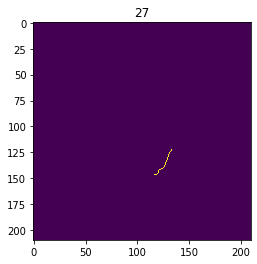

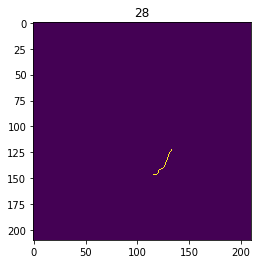

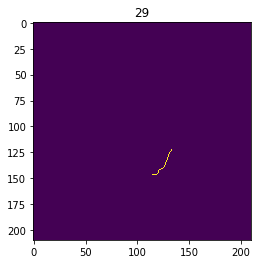

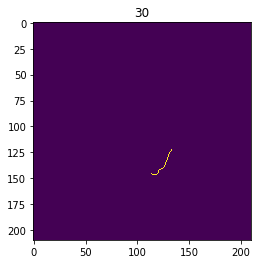

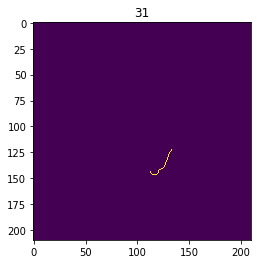

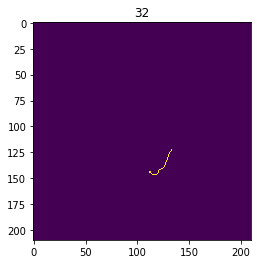

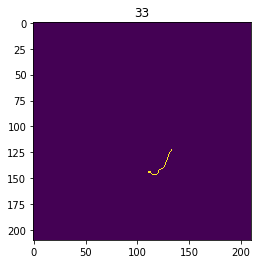

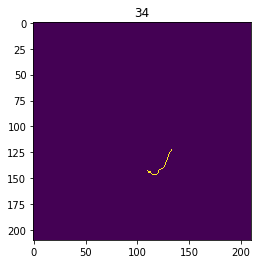

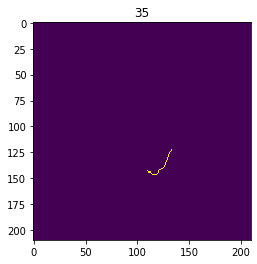

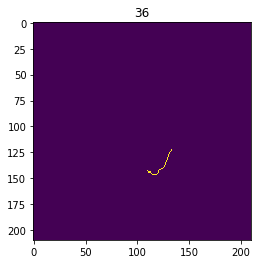

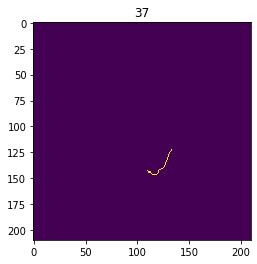

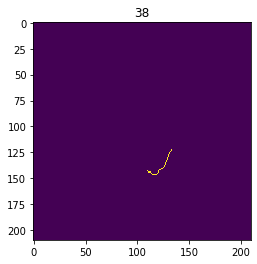

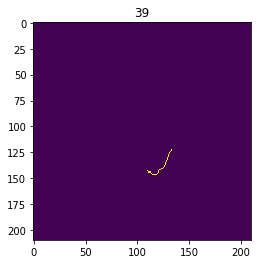

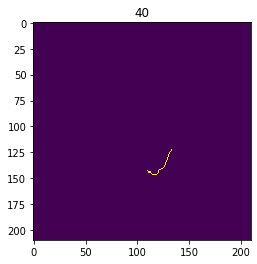

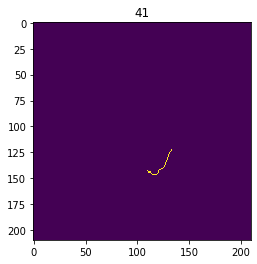

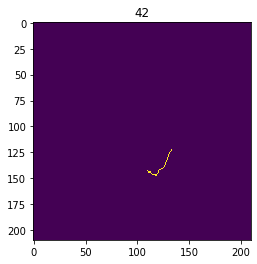

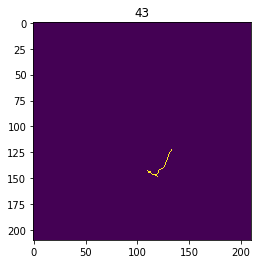

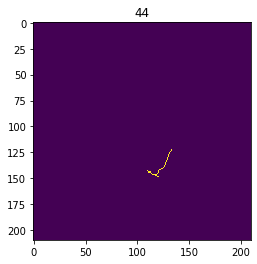

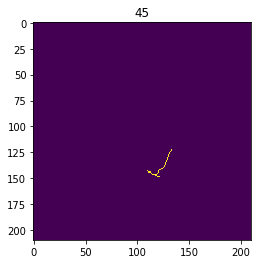

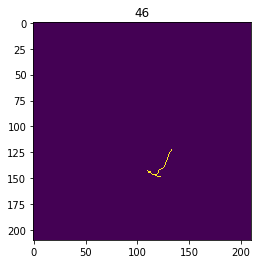

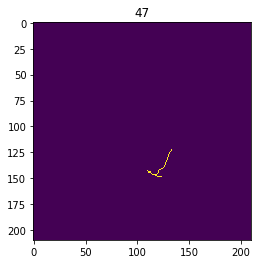

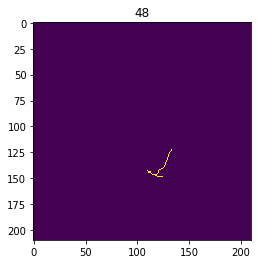

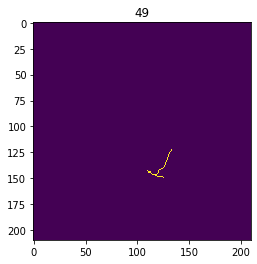

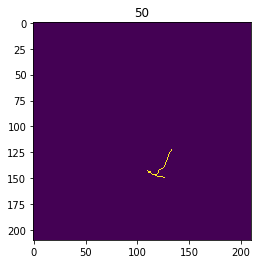

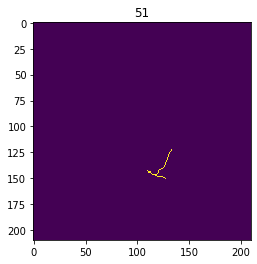

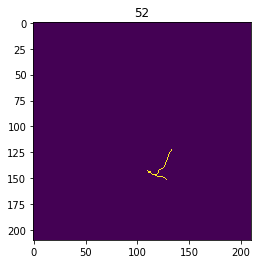

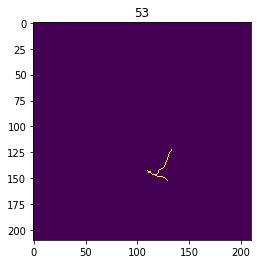

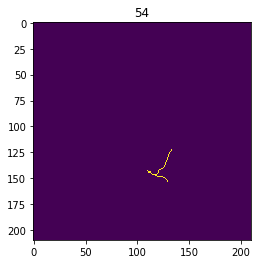

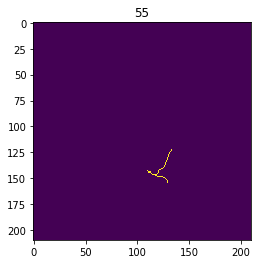

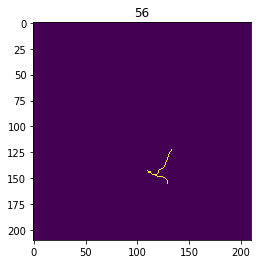

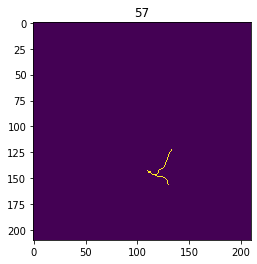

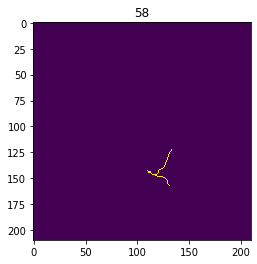

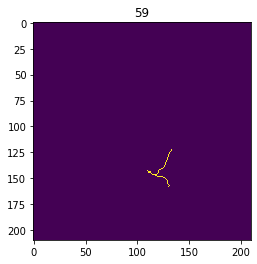

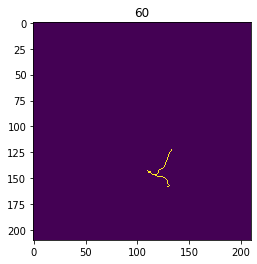

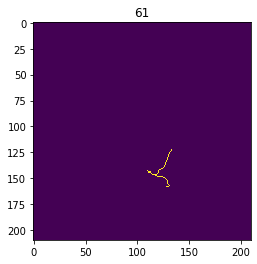

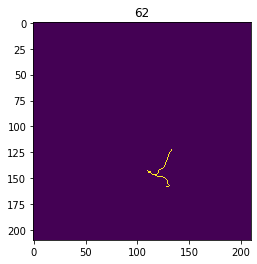

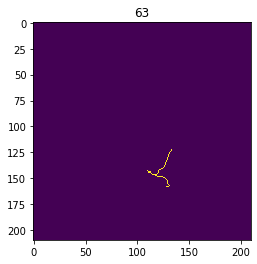

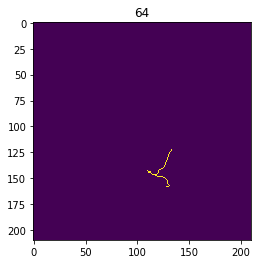

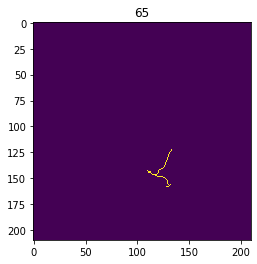

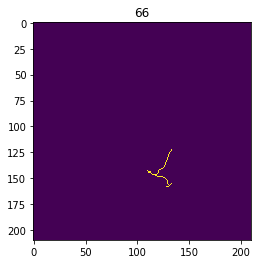

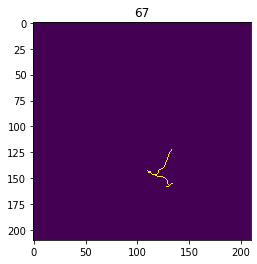

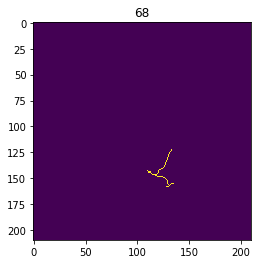

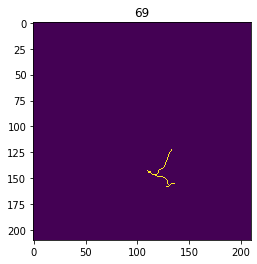

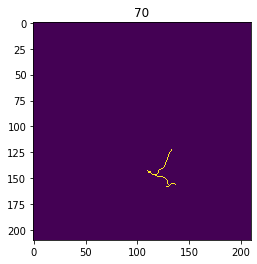

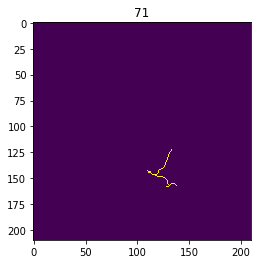

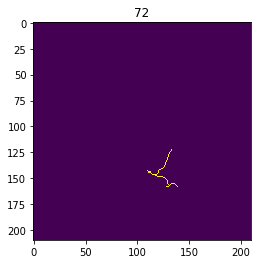

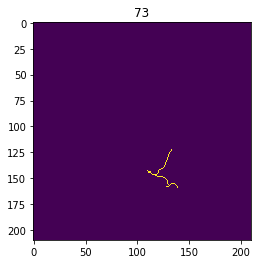

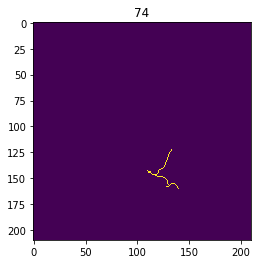

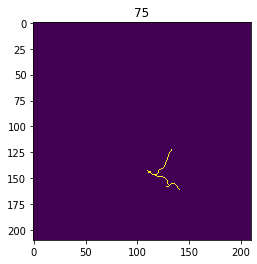

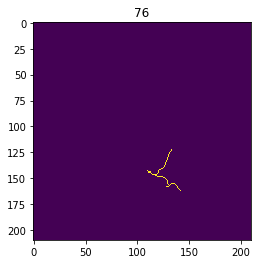

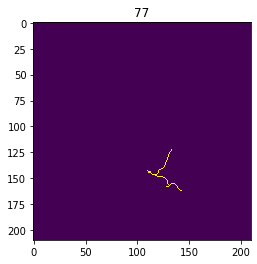

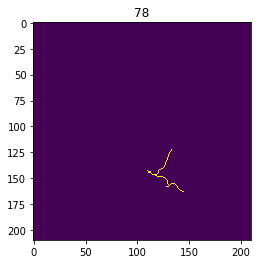

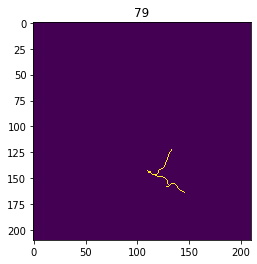

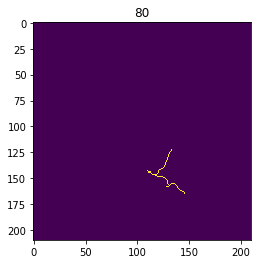

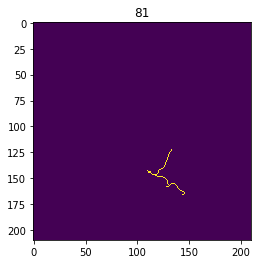

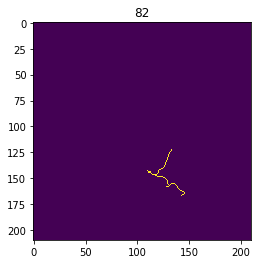

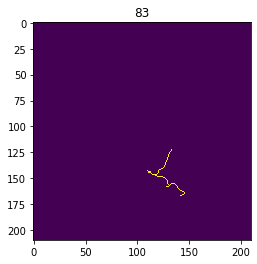

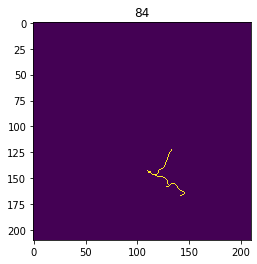

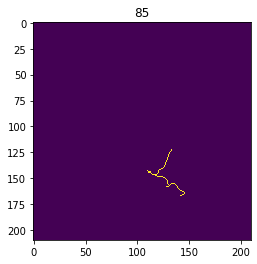

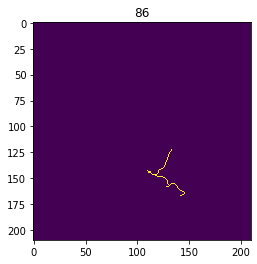

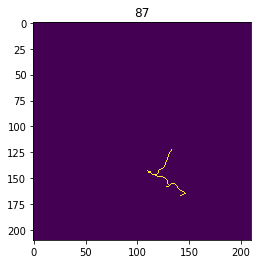

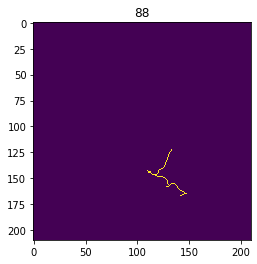

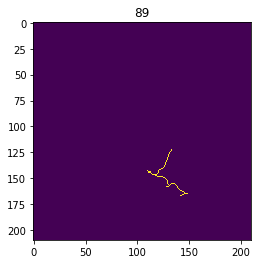

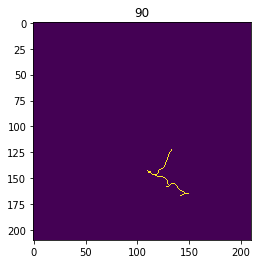

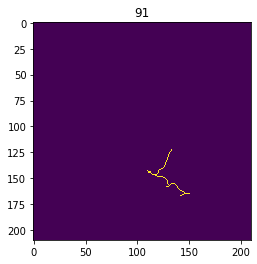

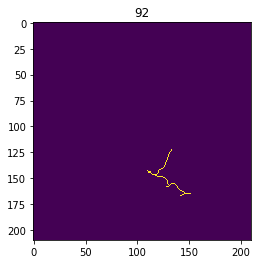

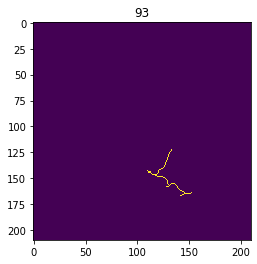

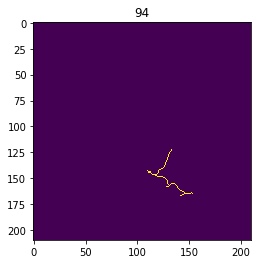

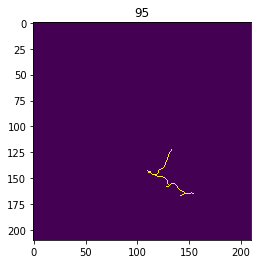

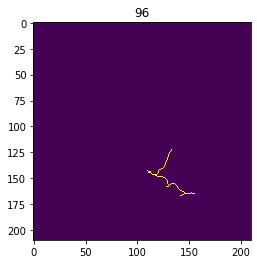

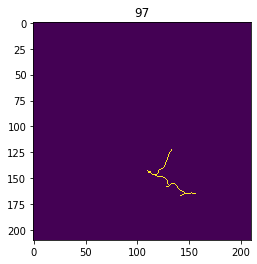

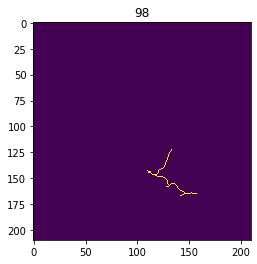

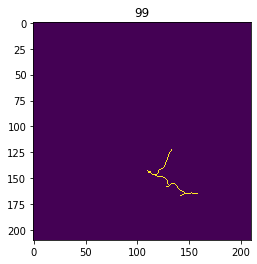

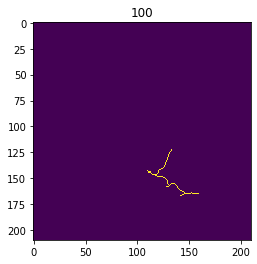

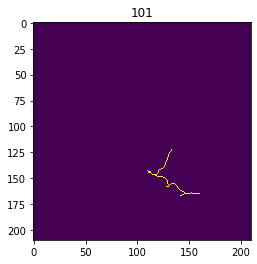

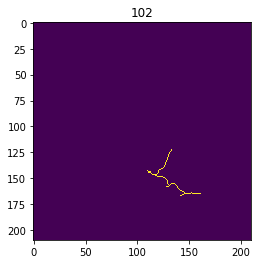

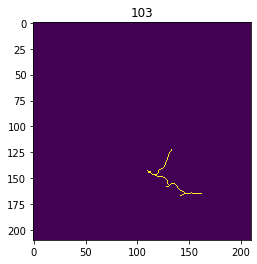

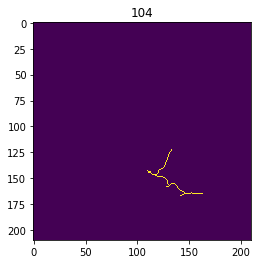

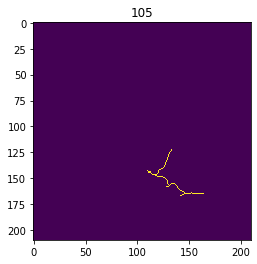

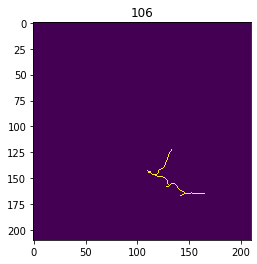

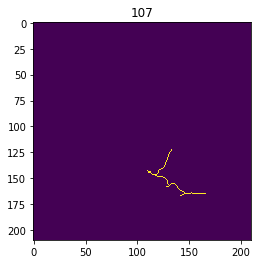

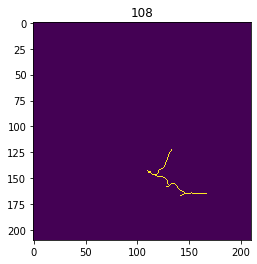

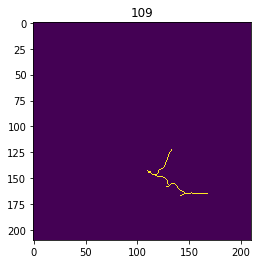

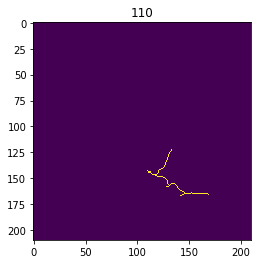

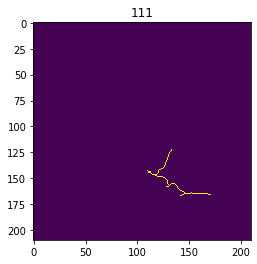

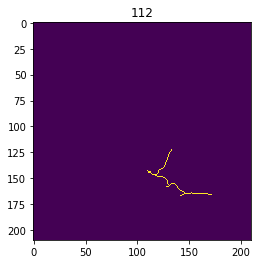

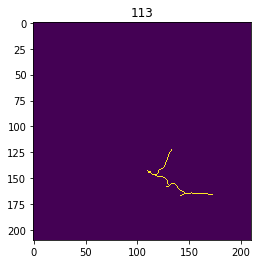

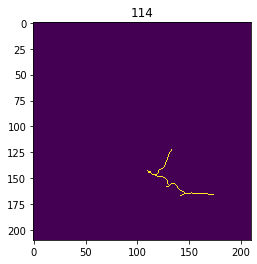

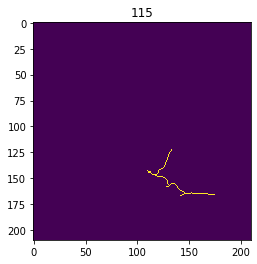

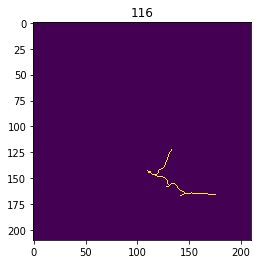

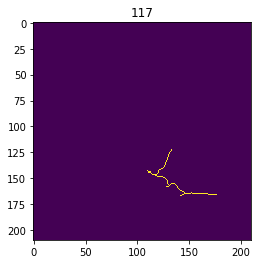

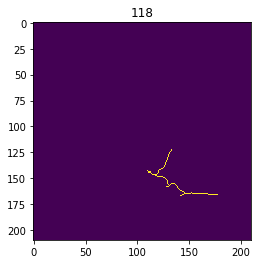

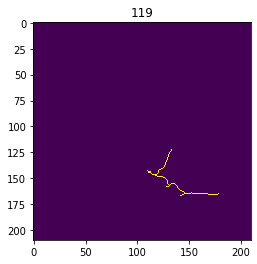

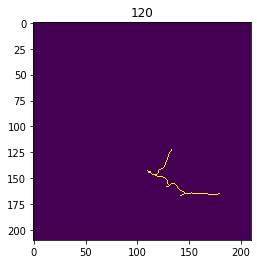

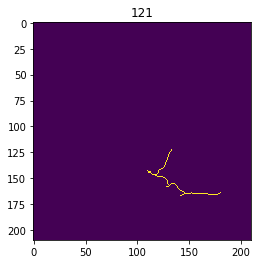

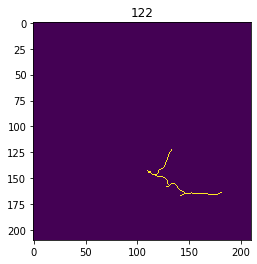

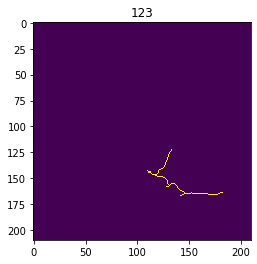

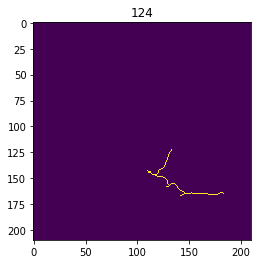

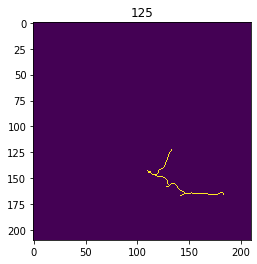

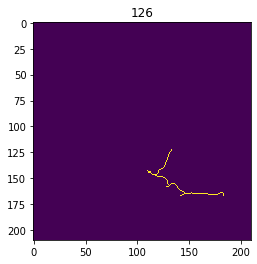

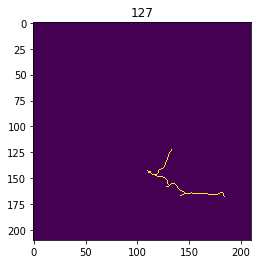

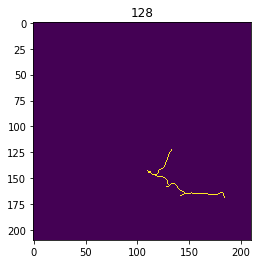

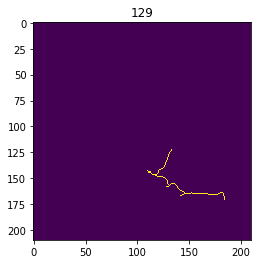

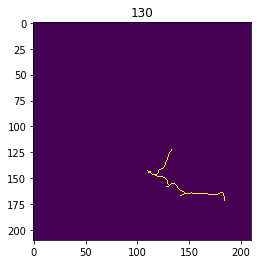

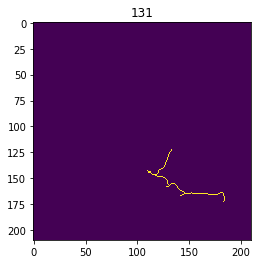

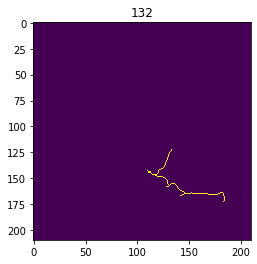

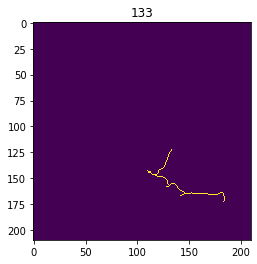

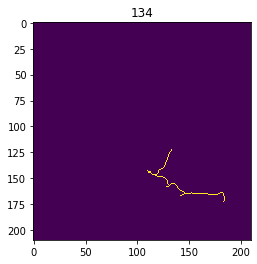

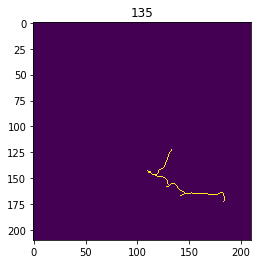

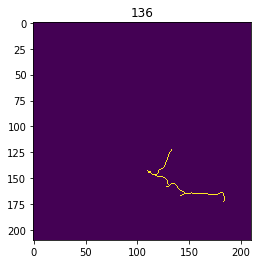

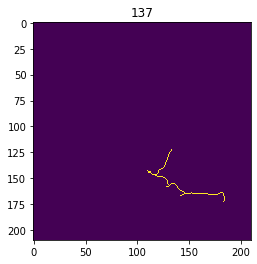

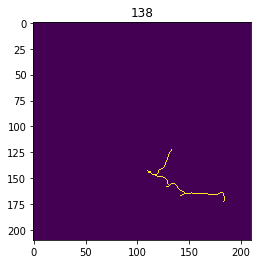

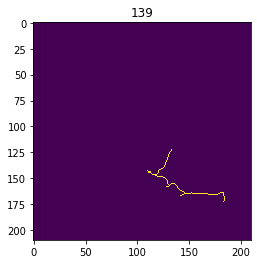

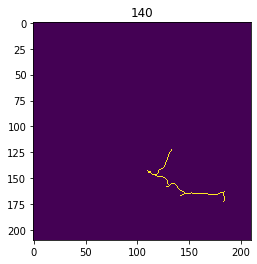

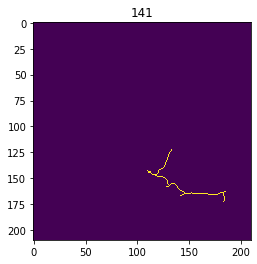

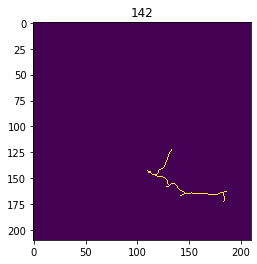

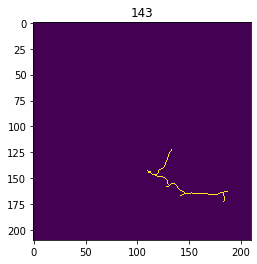

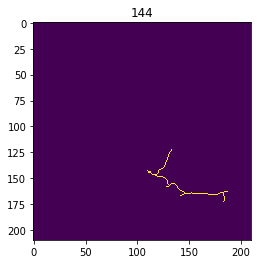

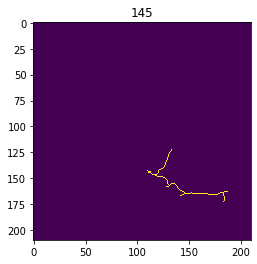

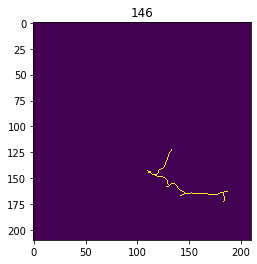

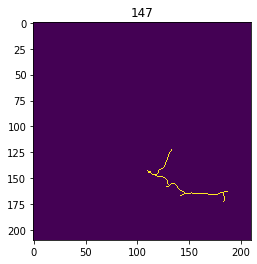

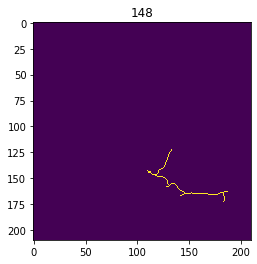

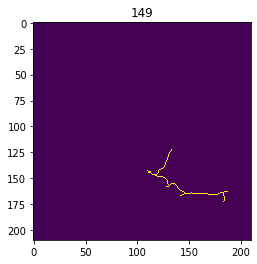

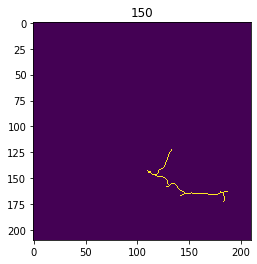

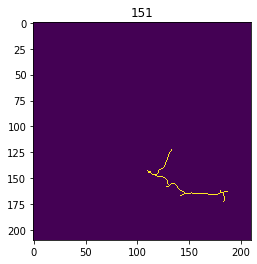

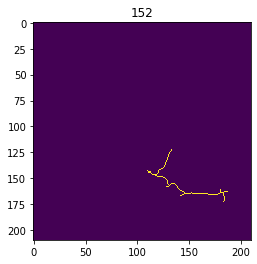

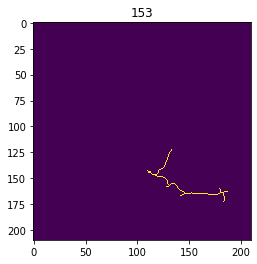

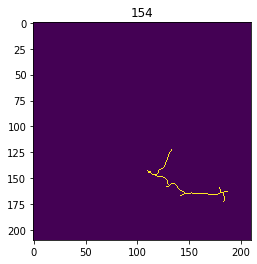

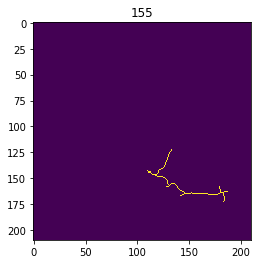

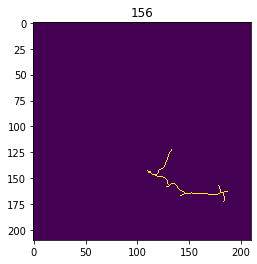

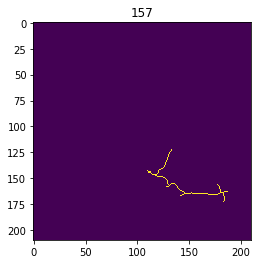

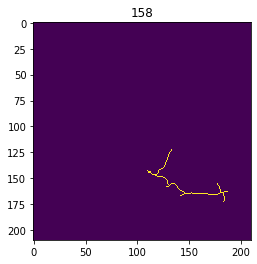

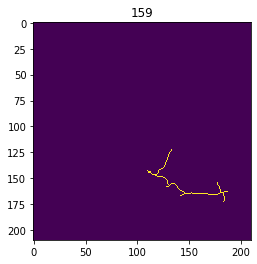

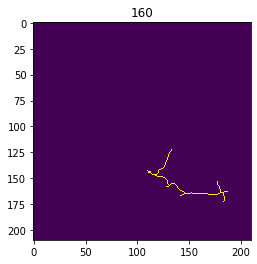

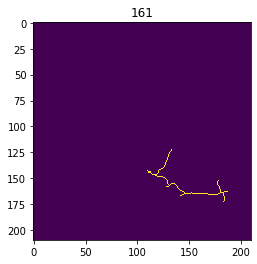

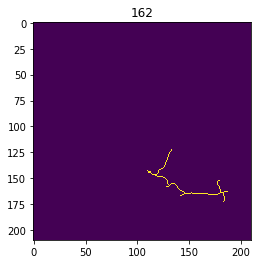

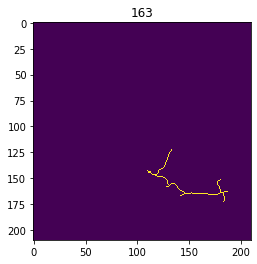

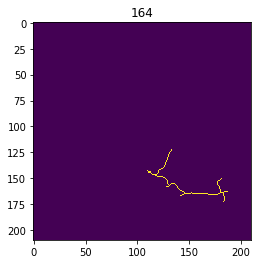

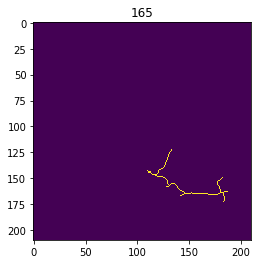

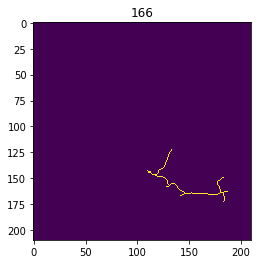

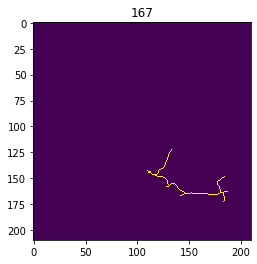

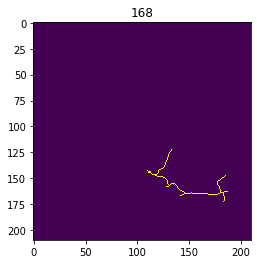

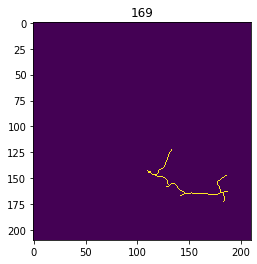

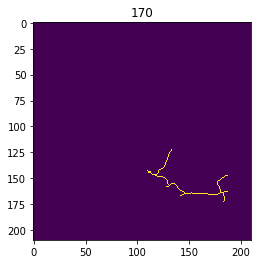

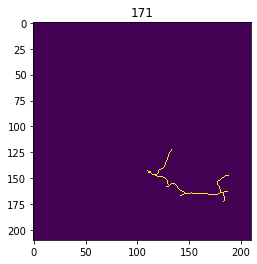

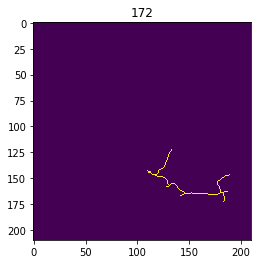

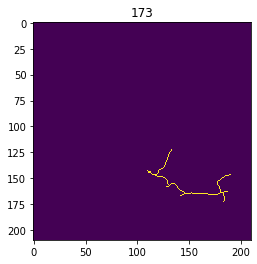

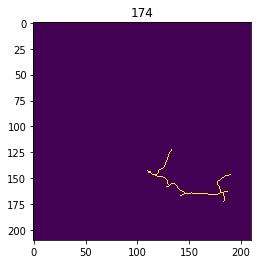

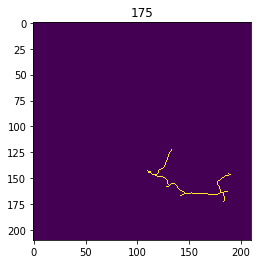

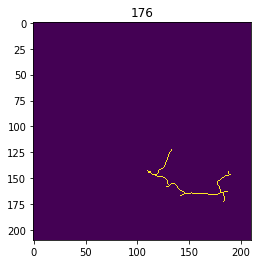

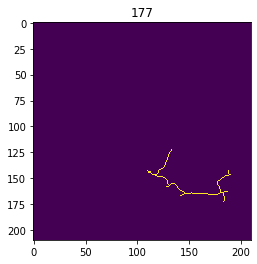

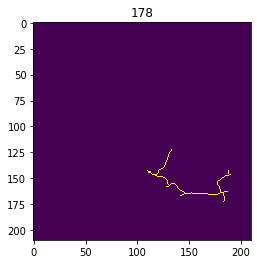

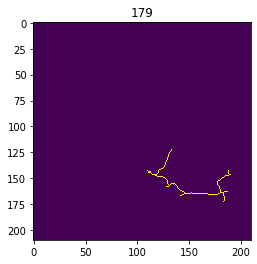

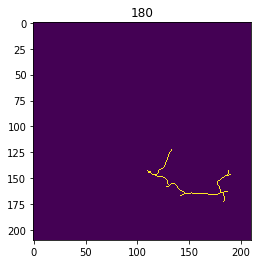

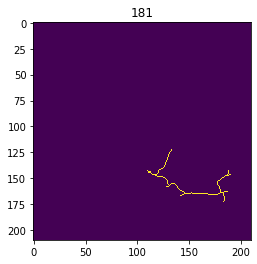

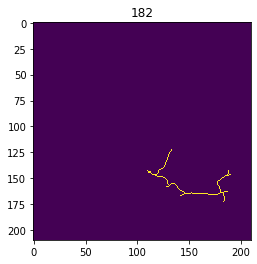

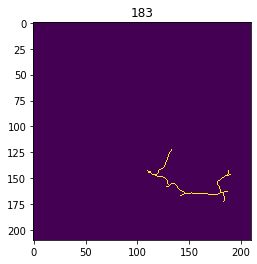

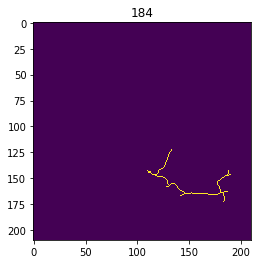

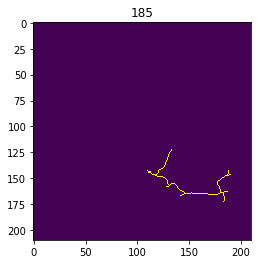

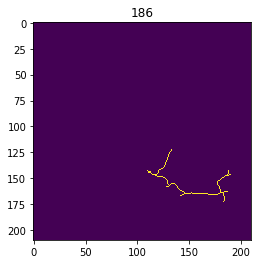

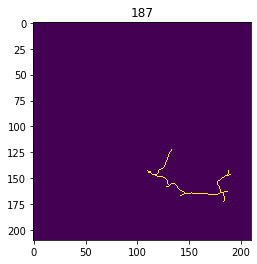

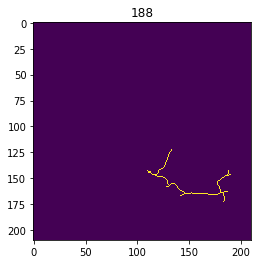

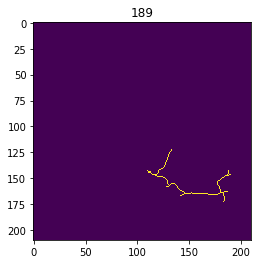

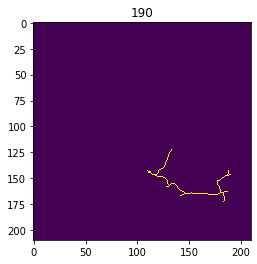

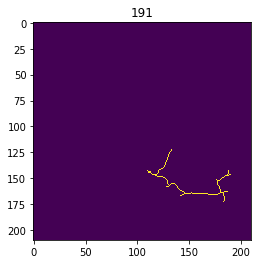

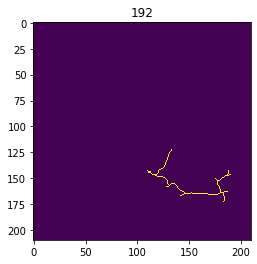

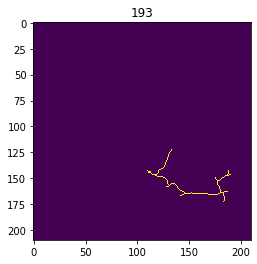

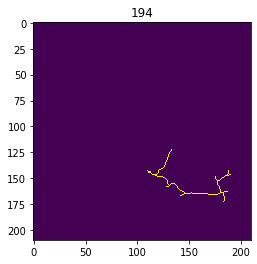

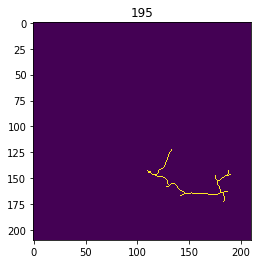

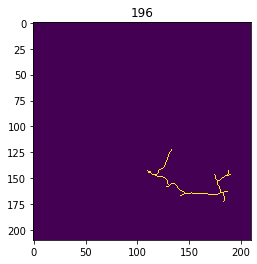

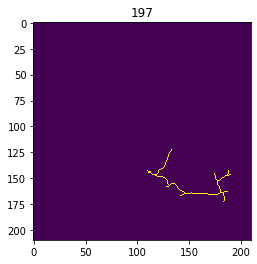

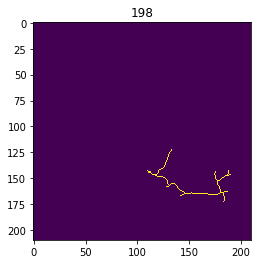

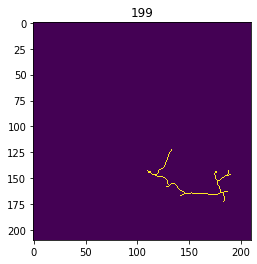

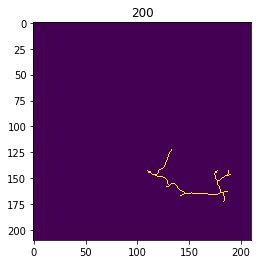

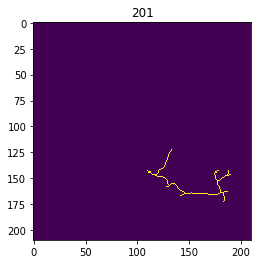

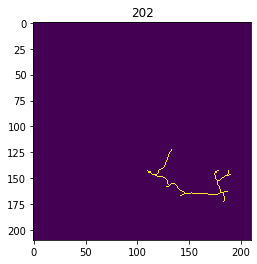

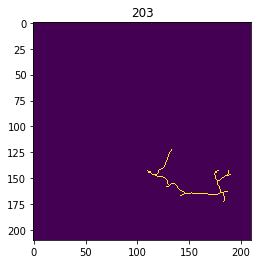

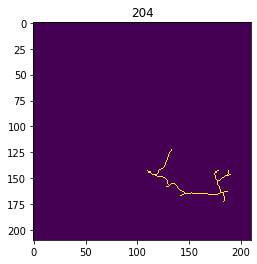

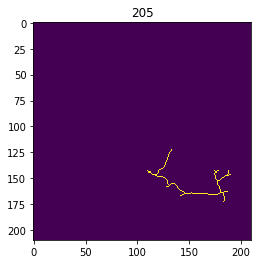

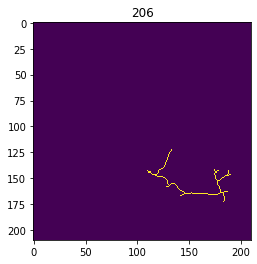

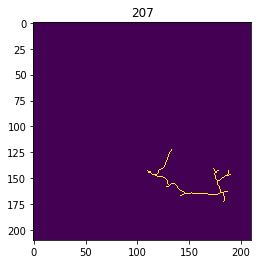

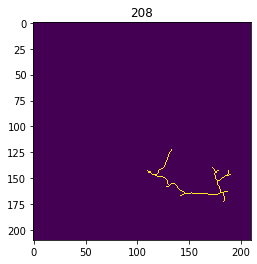

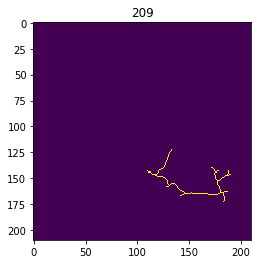

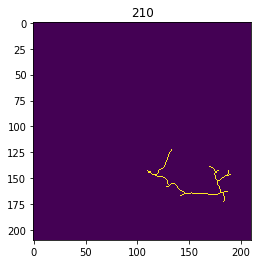

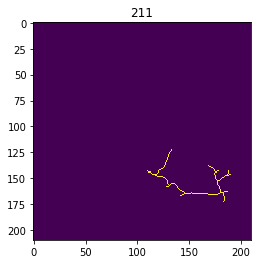

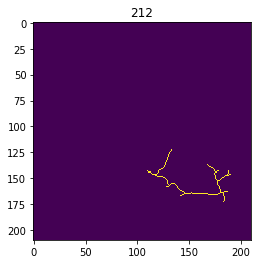

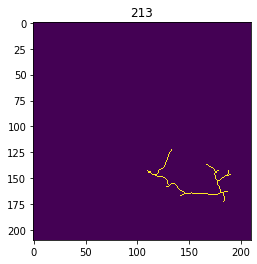

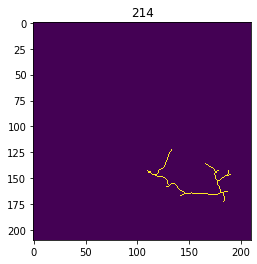

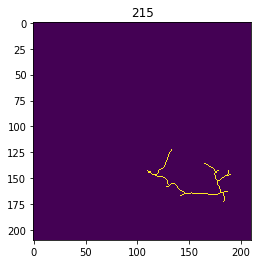

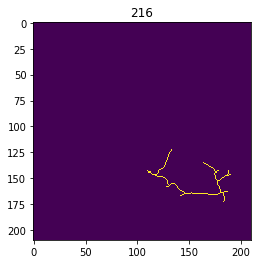

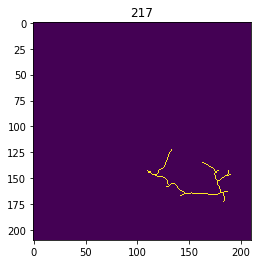

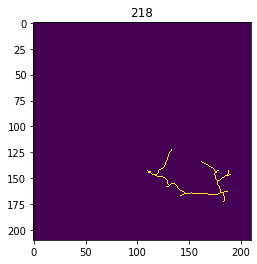

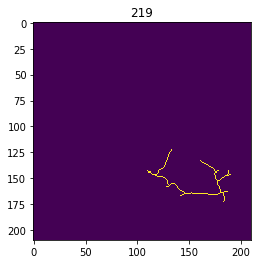

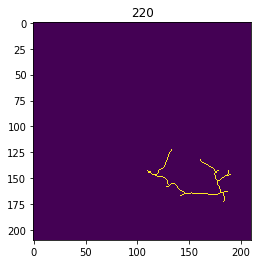

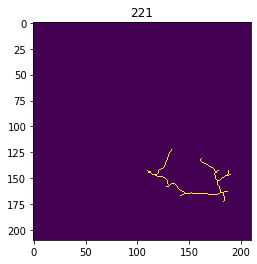

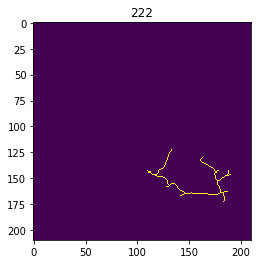

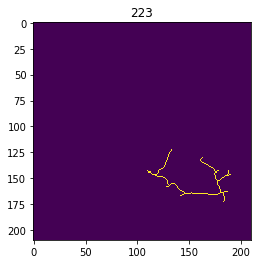

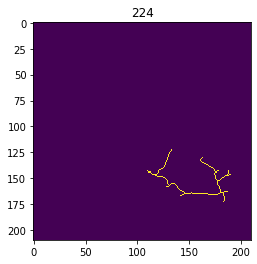

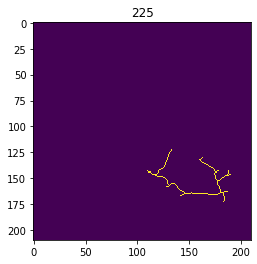

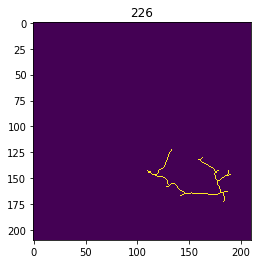

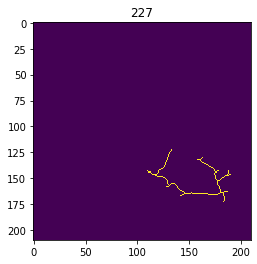

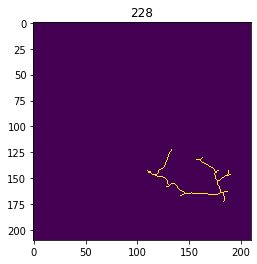

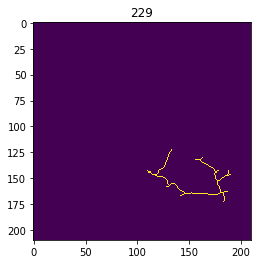

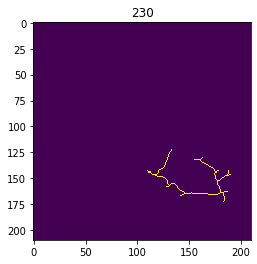

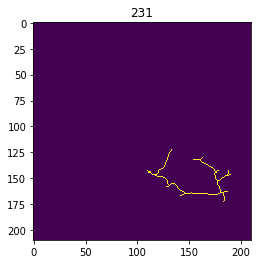

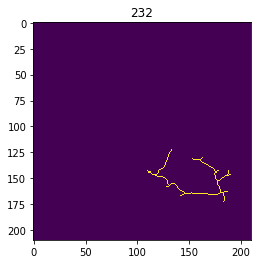

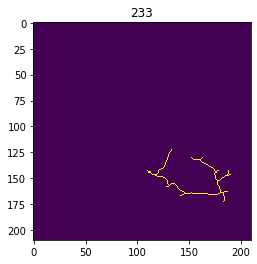

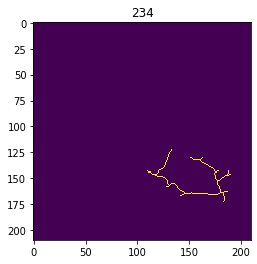

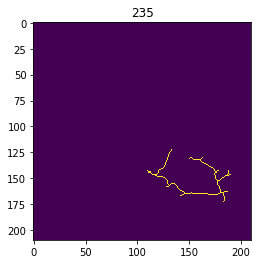

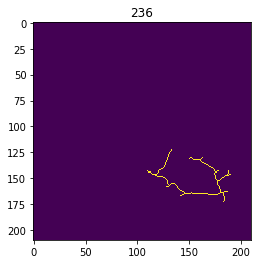

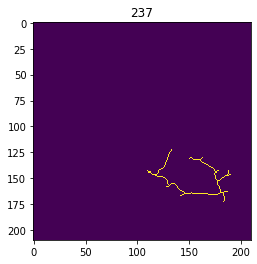

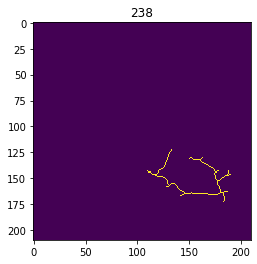

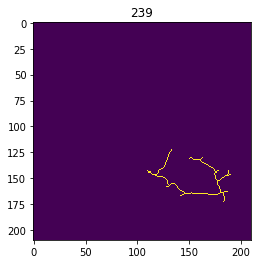

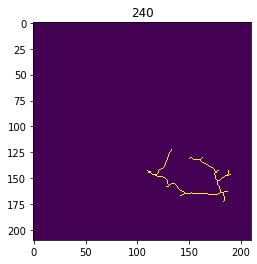

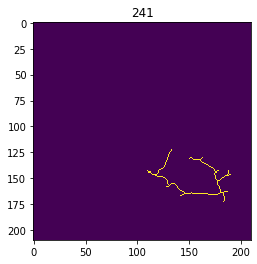

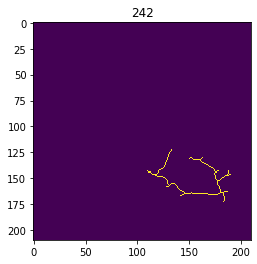

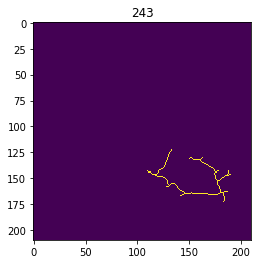

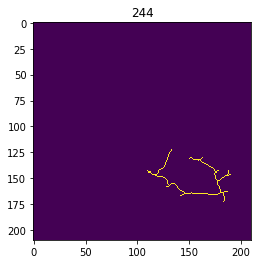

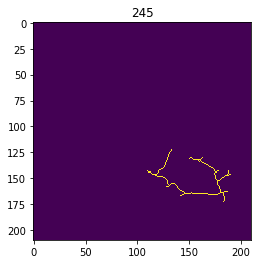

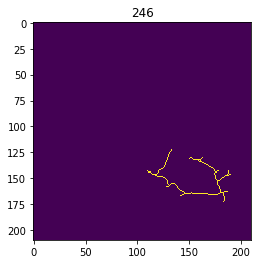

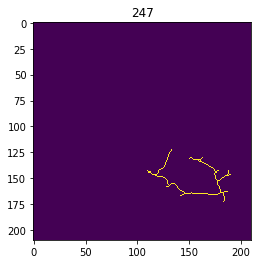

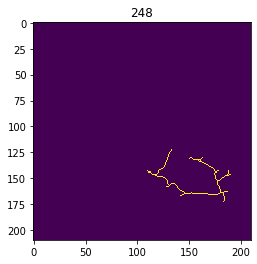

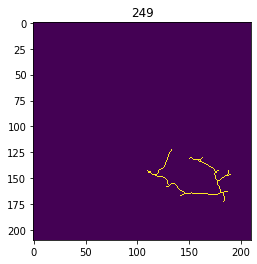

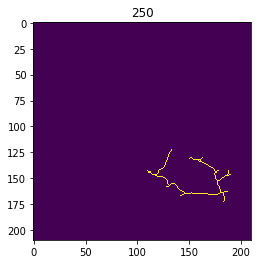

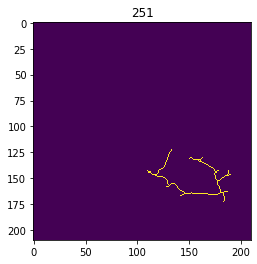

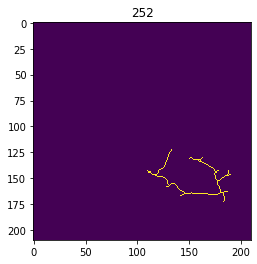

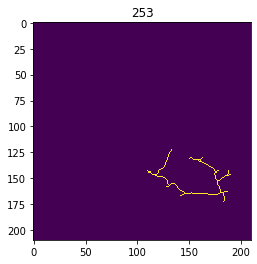

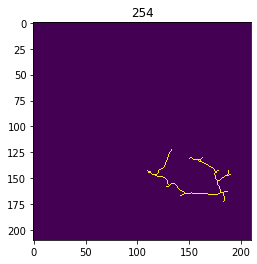

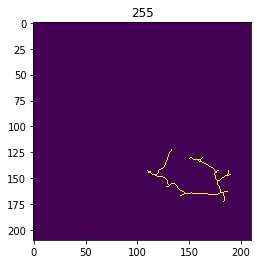

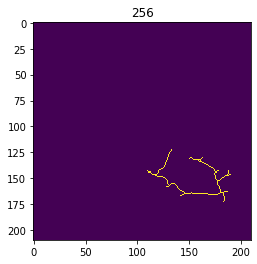

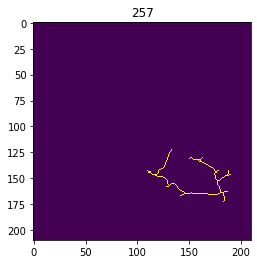

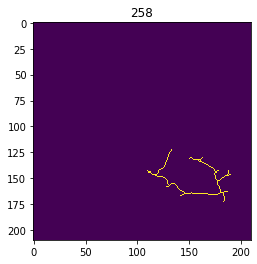

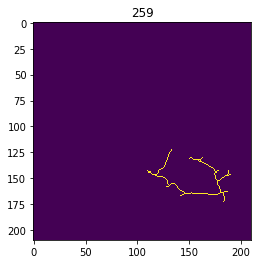

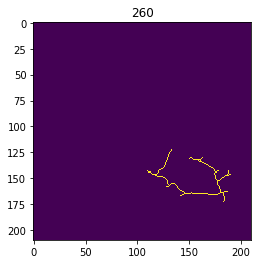

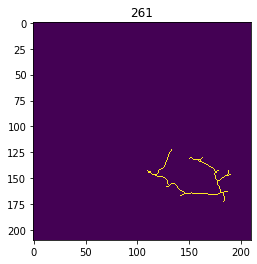

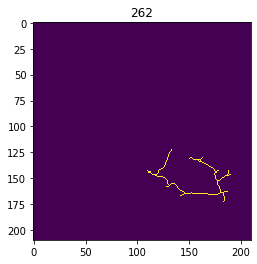

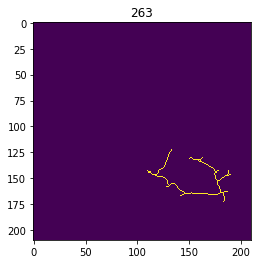

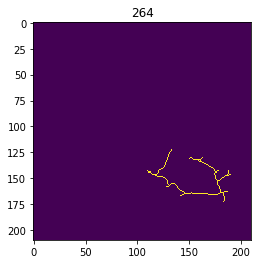

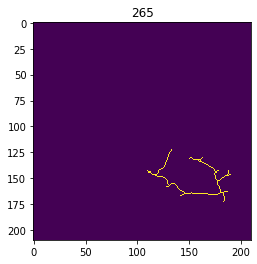

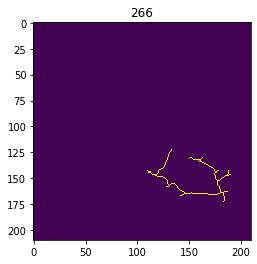

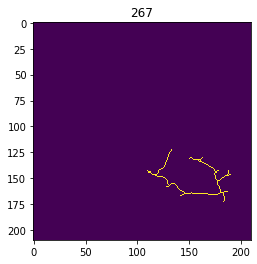

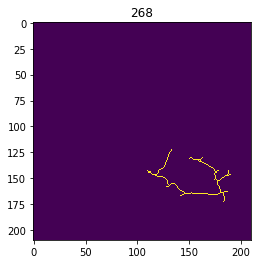

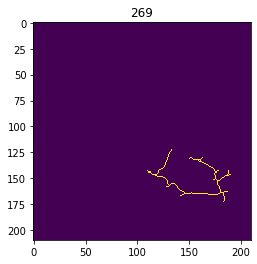

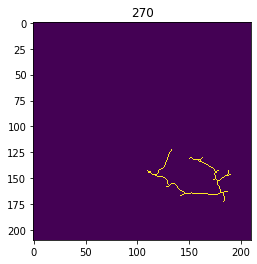

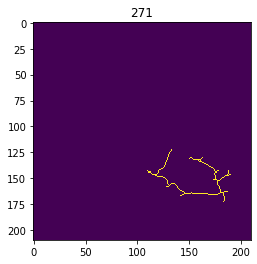

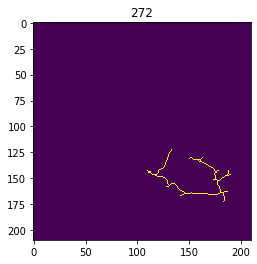

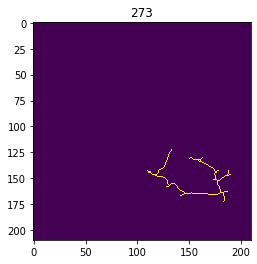

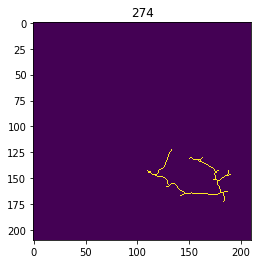

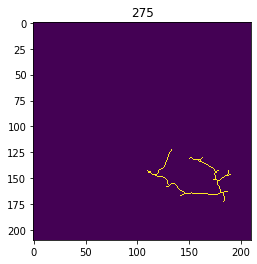

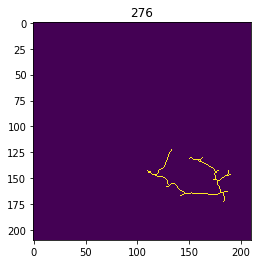

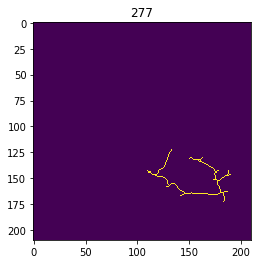

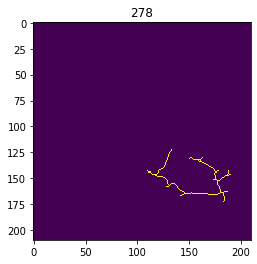

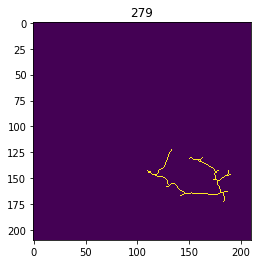

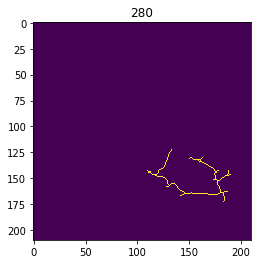

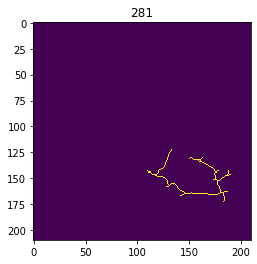

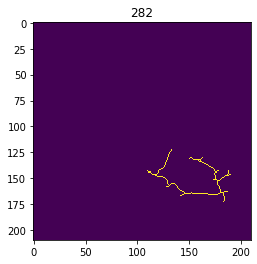

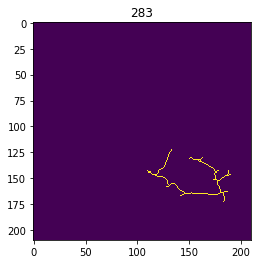

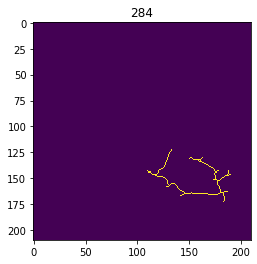

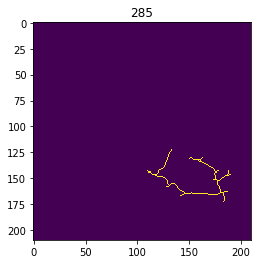

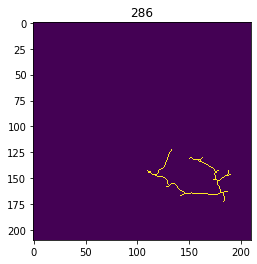

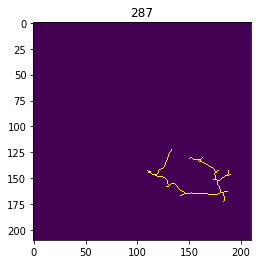

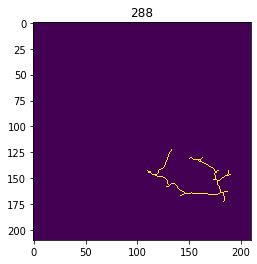

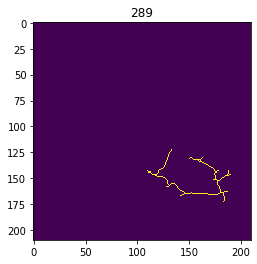

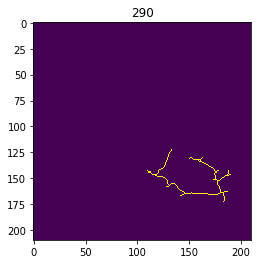

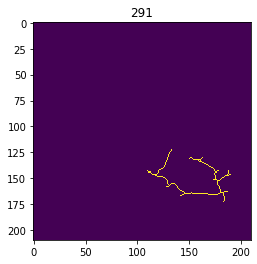

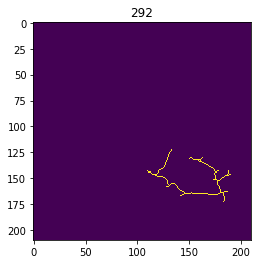

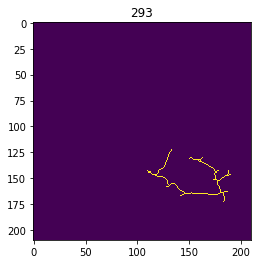

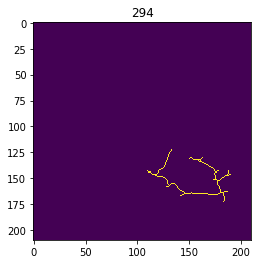

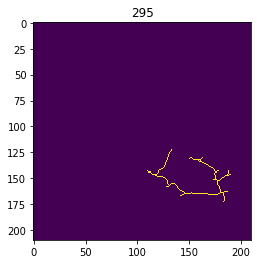

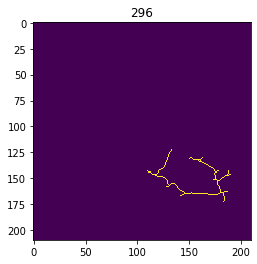

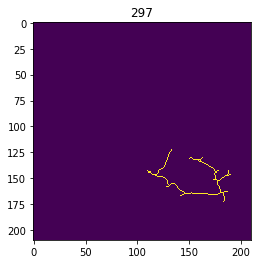

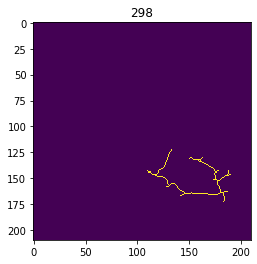

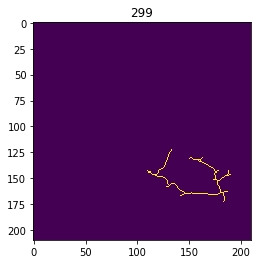

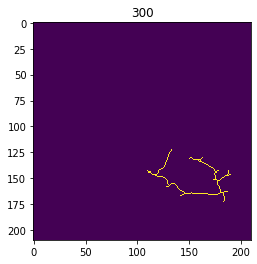

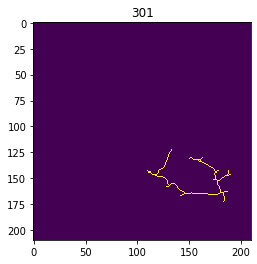

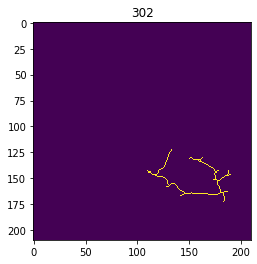

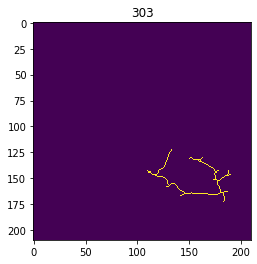

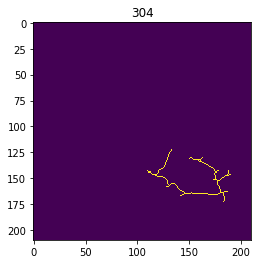

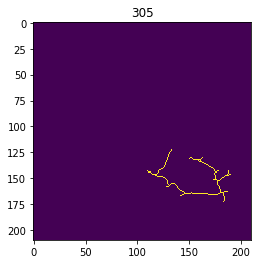

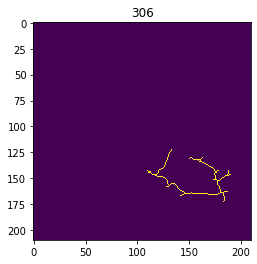

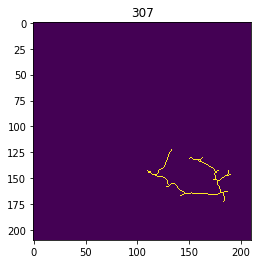

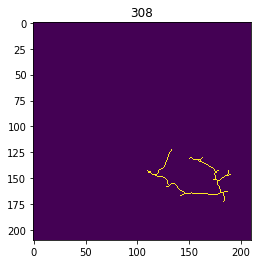

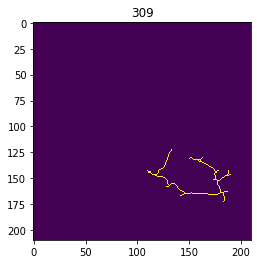

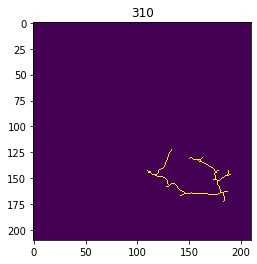

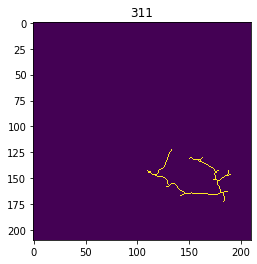

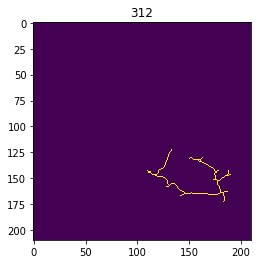

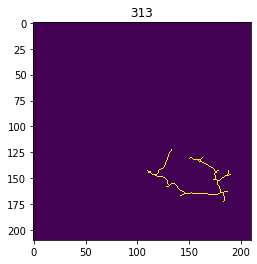

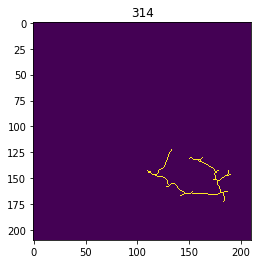

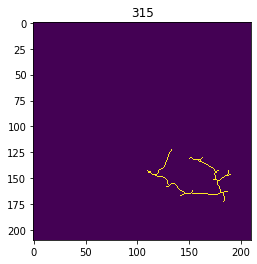

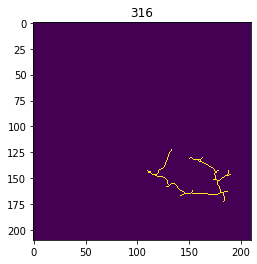

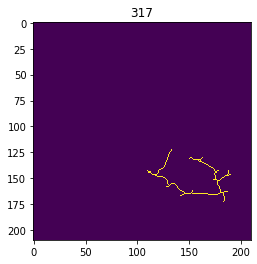

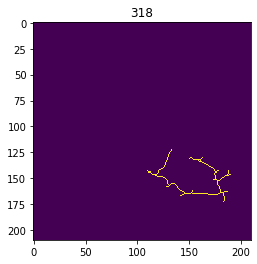

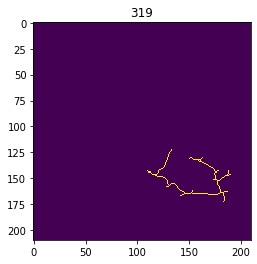

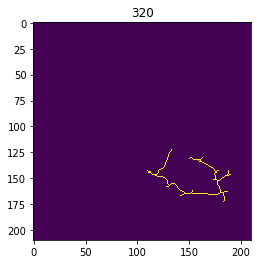

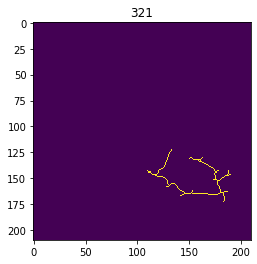

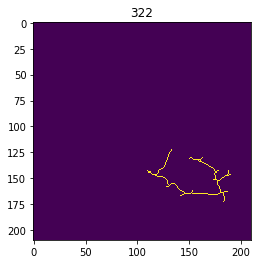

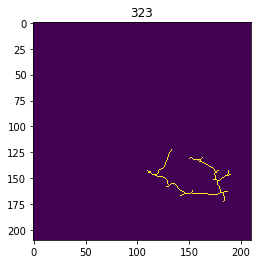

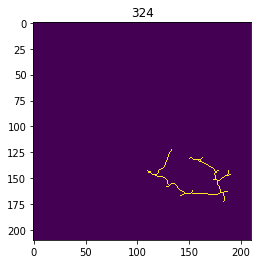

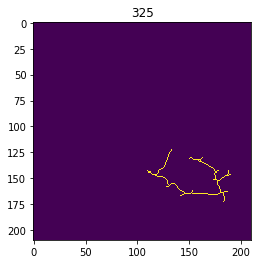

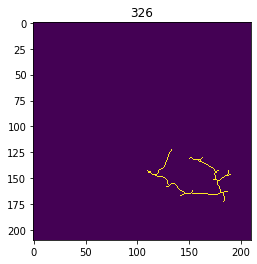

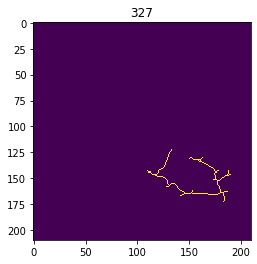

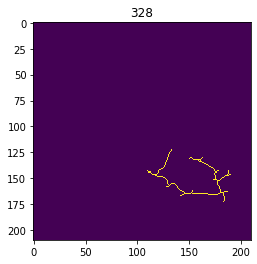

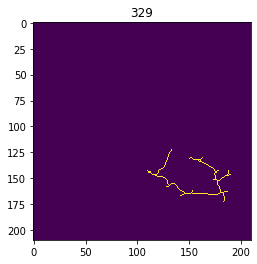

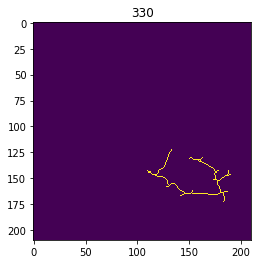

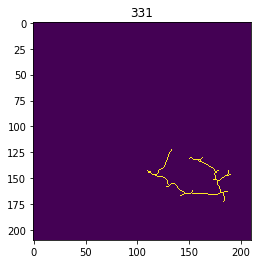

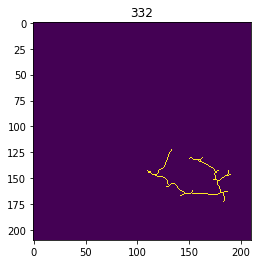

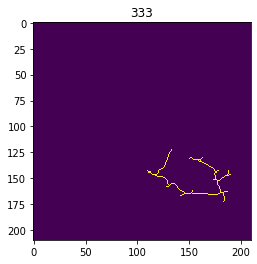

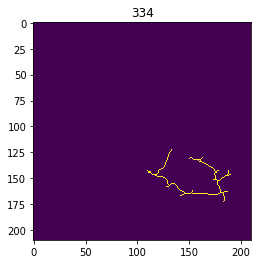

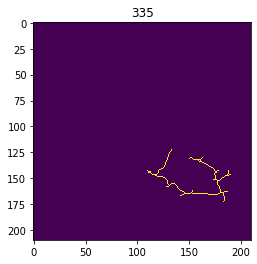

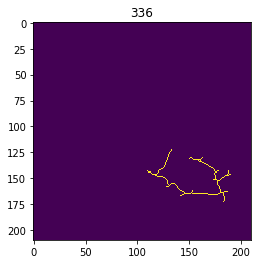

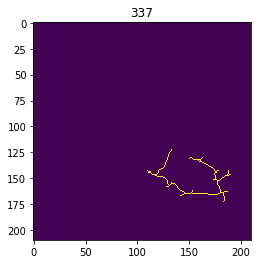

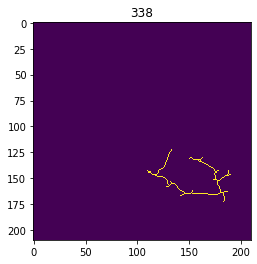

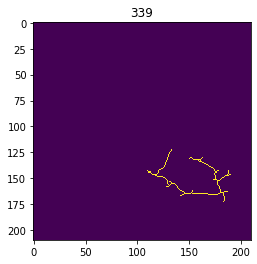

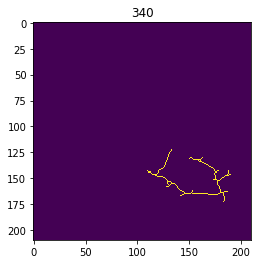

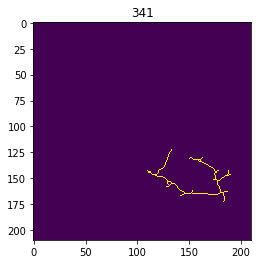

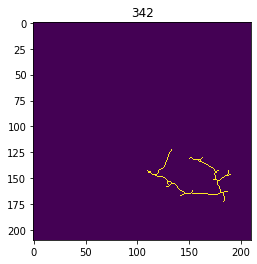

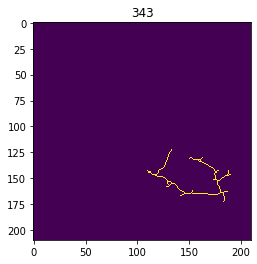

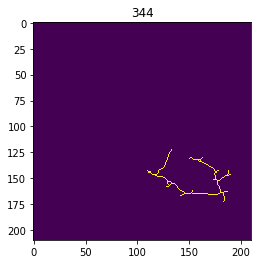

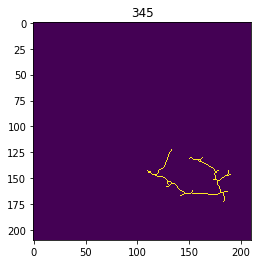

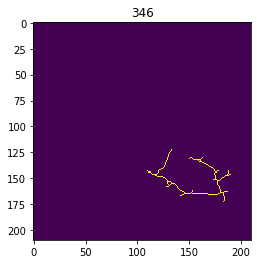

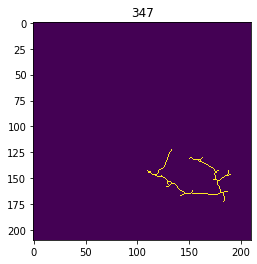

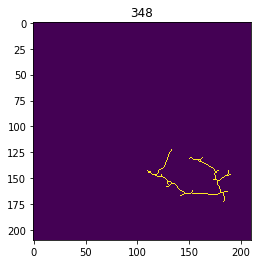

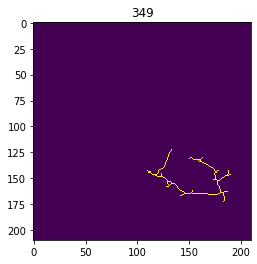

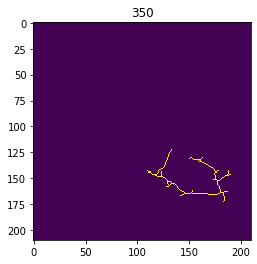

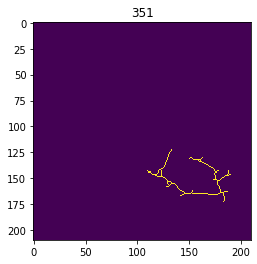

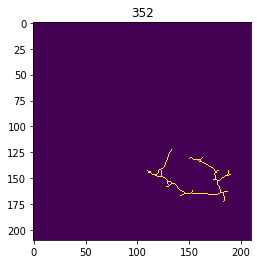

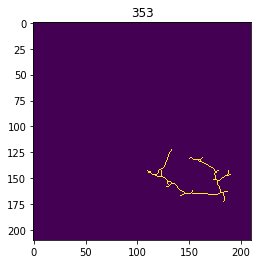

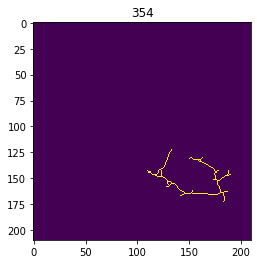

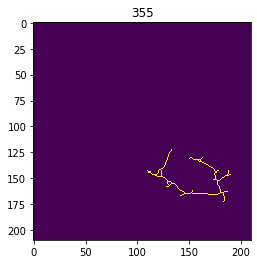

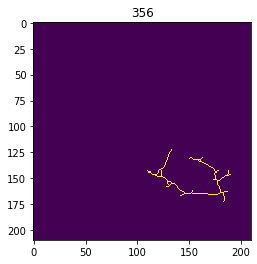

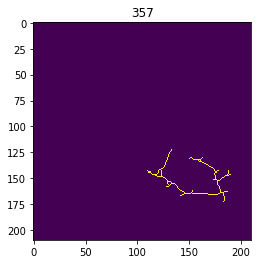

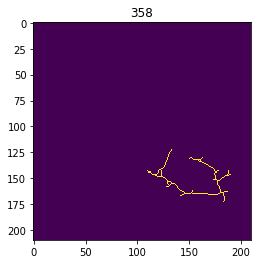

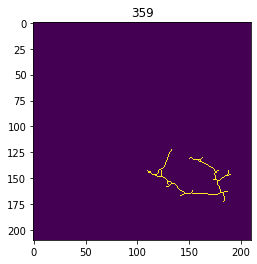

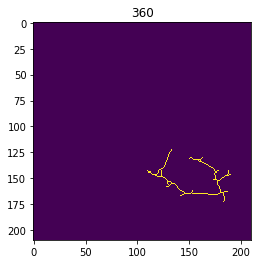

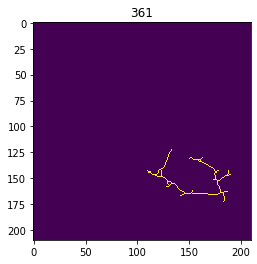

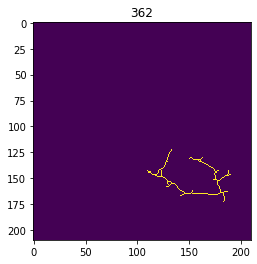

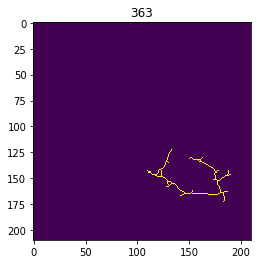

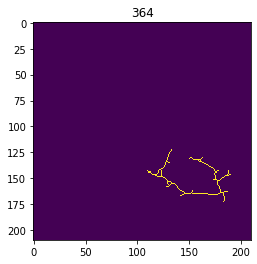

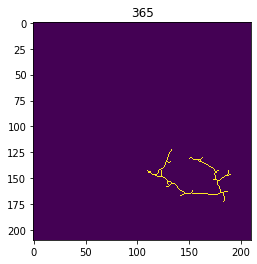

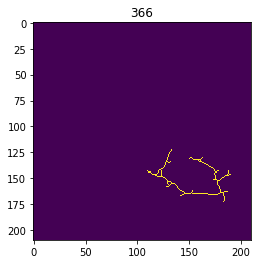

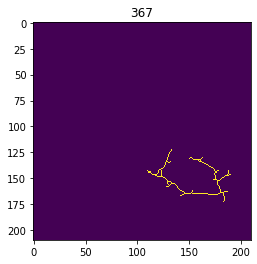

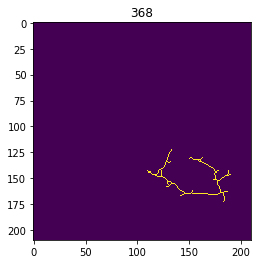

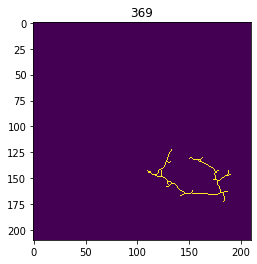

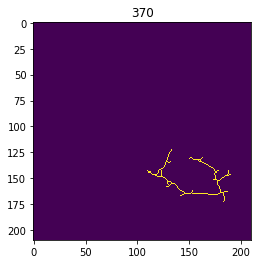

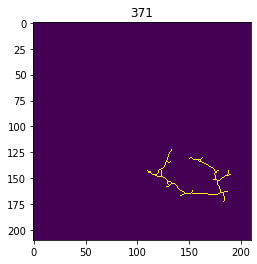

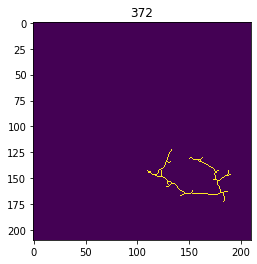

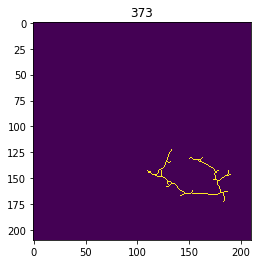

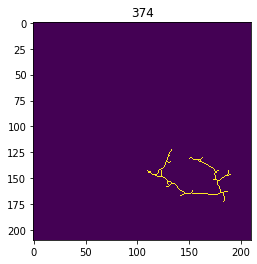

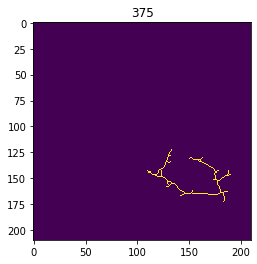

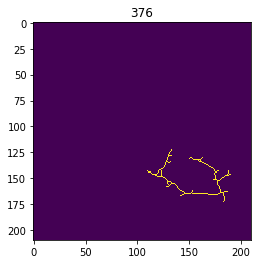

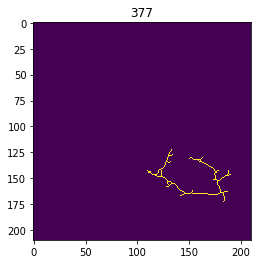

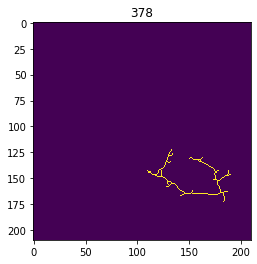

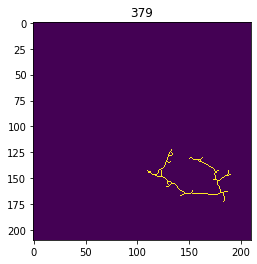

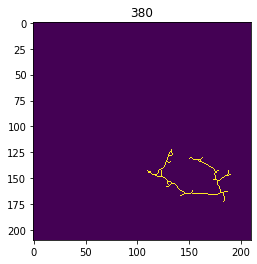

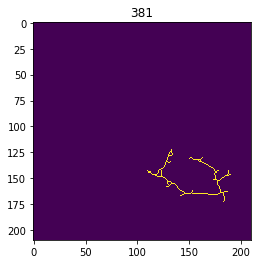

In [28]:
for pixel in contours[10]:
        zeros[pixel[0,1],pixel[0,0]] = 1
        plt.title(i)
        plt.imshow(zeros)
        plt.show()
        i+=1

# Removing duplicates:

In [29]:
cont = contours[10].copy()

In [30]:
cont[1]

array([[133, 123]], dtype=int32)

In [31]:
def num_to_str(contour):
    str_list = list()
    for c in contour:
        str_list.append(str(c[0][0])+str(c[0][1]))
    return str_list

In [32]:
str_list = num_to_str(cont)

In [33]:
str_list

['133122',
 '133123',
 '132124',
 '131125',
 '131126',
 '130127',
 '130128',
 '130129',
 '129130',
 '129131',
 '129132',
 '128133',
 '128134',
 '127135',
 '127136',
 '127137',
 '126138',
 '126139',
 '125140',
 '124141',
 '123141',
 '122142',
 '121142',
 '120143',
 '120144',
 '119145',
 '118146',
 '117146',
 '116146',
 '115146',
 '114145',
 '113144',
 '112144',
 '111144',
 '110143',
 '111144',
 '112144',
 '113144',
 '114145',
 '115146',
 '116146',
 '117146',
 '118147',
 '119148',
 '120148',
 '121148',
 '122148',
 '123148',
 '124148',
 '125149',
 '126149',
 '127150',
 '128151',
 '129152',
 '129153',
 '129154',
 '129155',
 '130156',
 '131157',
 '130158',
 '129158',
 '128158',
 '129158',
 '130158',
 '131157',
 '132156',
 '133155',
 '134155',
 '135155',
 '136155',
 '137156',
 '138157',
 '139158',
 '139159',
 '140160',
 '141161',
 '142162',
 '143162',
 '144163',
 '145164',
 '145165',
 '144166',
 '143167',
 '142167',
 '143167',
 '144166',
 '145165',
 '146165',
 '147165',
 '148165',
 '149165',

In [34]:
index_dict = dict()

In [35]:
index= 0

In [36]:
for i in range(len(str_list)):
    if str_list[i] not in index_dict.keys():
        index_dict[str_list[i]] = i

In [37]:
index_dict

{'133122': 0,
 '133123': 1,
 '132124': 2,
 '131125': 3,
 '131126': 4,
 '130127': 5,
 '130128': 6,
 '130129': 7,
 '129130': 8,
 '129131': 9,
 '129132': 10,
 '128133': 11,
 '128134': 12,
 '127135': 13,
 '127136': 14,
 '127137': 15,
 '126138': 16,
 '126139': 17,
 '125140': 18,
 '124141': 19,
 '123141': 20,
 '122142': 21,
 '121142': 22,
 '120143': 23,
 '120144': 24,
 '119145': 25,
 '118146': 26,
 '117146': 27,
 '116146': 28,
 '115146': 29,
 '114145': 30,
 '113144': 31,
 '112144': 32,
 '111144': 33,
 '110143': 34,
 '118147': 42,
 '119148': 43,
 '120148': 44,
 '121148': 45,
 '122148': 46,
 '123148': 47,
 '124148': 48,
 '125149': 49,
 '126149': 50,
 '127150': 51,
 '128151': 52,
 '129152': 53,
 '129153': 54,
 '129154': 55,
 '129155': 56,
 '130156': 57,
 '131157': 58,
 '130158': 59,
 '129158': 60,
 '128158': 61,
 '132156': 65,
 '133155': 66,
 '134155': 67,
 '135155': 68,
 '136155': 69,
 '137156': 70,
 '138157': 71,
 '139158': 72,
 '139159': 73,
 '140160': 74,
 '141161': 75,
 '142162': 76,
 '143

In [38]:
len(index_dict.values())

221

In [39]:
len(cont)

382

In [40]:
new_dict = dict((val,key) for key,val in index_dict.items())

In [41]:
sub_cont = list()

In [42]:
keys = list(new_dict.keys())

In [43]:
keys.sort()

In [44]:
sub_cont.append(list())

In [45]:
last_ind = 0

In [46]:
sub_cont[last_ind].append(new_dict[keys[0]])

In [47]:
for i in range(len(keys)-1):
    if keys[i+1]-keys[i]!=1:
        last_ind+=1
        sub_cont.append(list())
        sub_cont[last_ind].append(new_dict[keys[i+1]])
    else:
        sub_cont[last_ind].append(new_dict[keys[i+1]])

In [48]:
u = 0
for x in sub_cont:
    u+=len(x)
print(u)

221


In [49]:
sub_cont

[['133122',
  '133123',
  '132124',
  '131125',
  '131126',
  '130127',
  '130128',
  '130129',
  '129130',
  '129131',
  '129132',
  '128133',
  '128134',
  '127135',
  '127136',
  '127137',
  '126138',
  '126139',
  '125140',
  '124141',
  '123141',
  '122142',
  '121142',
  '120143',
  '120144',
  '119145',
  '118146',
  '117146',
  '116146',
  '115146',
  '114145',
  '113144',
  '112144',
  '111144',
  '110143'],
 ['118147',
  '119148',
  '120148',
  '121148',
  '122148',
  '123148',
  '124148',
  '125149',
  '126149',
  '127150',
  '128151',
  '129152',
  '129153',
  '129154',
  '129155',
  '130156',
  '131157',
  '130158',
  '129158',
  '128158'],
 ['132156',
  '133155',
  '134155',
  '135155',
  '136155',
  '137156',
  '138157',
  '139158',
  '139159',
  '140160',
  '141161',
  '142162',
  '143162',
  '144163',
  '145164',
  '145165',
  '144166',
  '143167',
  '142167'],
 ['146165',
  '147165',
  '148165',
  '149165',
  '150165',
  '151165',
  '152164',
  '153165',
  '154165',
 

In [50]:
num_cont = sub_cont.copy()

In [51]:
int(num_cont[0][0])

133122

In [52]:
for l in range(len(num_cont)):
    for s in range(len(num_cont[l])):
        print(l,s)
        print(num_cont[l][s])
        n = int(num_cont[l][s])
        x = n//1000
        y = n%1000
        num_cont[l][s] = [x,y]

0 0
133122
0 1
133123
0 2
132124
0 3
131125
0 4
131126
0 5
130127
0 6
130128
0 7
130129
0 8
129130
0 9
129131
0 10
129132
0 11
128133
0 12
128134
0 13
127135
0 14
127136
0 15
127137
0 16
126138
0 17
126139
0 18
125140
0 19
124141
0 20
123141
0 21
122142
0 22
121142
0 23
120143
0 24
120144
0 25
119145
0 26
118146
0 27
117146
0 28
116146
0 29
115146
0 30
114145
0 31
113144
0 32
112144
0 33
111144
0 34
110143
1 0
118147
1 1
119148
1 2
120148
1 3
121148
1 4
122148
1 5
123148
1 6
124148
1 7
125149
1 8
126149
1 9
127150
1 10
128151
1 11
129152
1 12
129153
1 13
129154
1 14
129155
1 15
130156
1 16
131157
1 17
130158
1 18
129158
1 19
128158
2 0
132156
2 1
133155
2 2
134155
2 3
135155
2 4
136155
2 5
137156
2 6
138157
2 7
139158
2 8
139159
2 9
140160
2 10
141161
2 11
142162
2 12
143162
2 13
144163
2 14
145164
2 15
145165
2 16
144166
2 17
143167
2 18
142167
3 0
146165
3 1
147165
3 2
148165
3 3
149165
3 4
150165
3 5
151165
3 6
152164
3 7
153165
3 8
154165
3 9
155165
3 10
156165
3 11
157165
3 12
158

In [53]:
num_cont

[[[133, 122],
  [133, 123],
  [132, 124],
  [131, 125],
  [131, 126],
  [130, 127],
  [130, 128],
  [130, 129],
  [129, 130],
  [129, 131],
  [129, 132],
  [128, 133],
  [128, 134],
  [127, 135],
  [127, 136],
  [127, 137],
  [126, 138],
  [126, 139],
  [125, 140],
  [124, 141],
  [123, 141],
  [122, 142],
  [121, 142],
  [120, 143],
  [120, 144],
  [119, 145],
  [118, 146],
  [117, 146],
  [116, 146],
  [115, 146],
  [114, 145],
  [113, 144],
  [112, 144],
  [111, 144],
  [110, 143]],
 [[118, 147],
  [119, 148],
  [120, 148],
  [121, 148],
  [122, 148],
  [123, 148],
  [124, 148],
  [125, 149],
  [126, 149],
  [127, 150],
  [128, 151],
  [129, 152],
  [129, 153],
  [129, 154],
  [129, 155],
  [130, 156],
  [131, 157],
  [130, 158],
  [129, 158],
  [128, 158]],
 [[132, 156],
  [133, 155],
  [134, 155],
  [135, 155],
  [136, 155],
  [137, 156],
  [138, 157],
  [139, 158],
  [139, 159],
  [140, 160],
  [141, 161],
  [142, 162],
  [143, 162],
  [144, 163],
  [145, 164],
  [145, 165],
  [1

In [54]:
# FINAL:


In [55]:
def num_to_str(contour):
    str_list = list()
    for c in contour:
        str_list.append(str(c[0][0])+str(c[0][1]))
    return str_list

def get_unique(contour):
    cont = contour.copy()
    str_list = num_to_str(cont)
    index_dict = dict()
    for i in range(len(str_list)):
        if str_list[i] not in index_dict.keys():
            index_dict[str_list[i]] = i
    new_dict = dict((val,key) for key,val in index_dict.items())
    sub_cont = list()
    keys = list(new_dict.keys())
    keys.sort()
    sub_cont.append(list())
    last_ind = 0
    sub_cont[last_ind].append(new_dict[keys[0]])
    for i in range(len(keys)-1):
        if keys[i+1]-keys[i]!=1:
            last_ind+=1
            sub_cont.append(list())
            sub_cont[last_ind].append(new_dict[keys[i+1]])
        else:
            sub_cont[last_ind].append(new_dict[keys[i+1]])
    num_cont = sub_cont.copy()
    for l in range(len(num_cont)):
        for s in range(len(num_cont[l])):
            n = int(num_cont[l][s])
            x = n//1000
            y = n%1000
            num_cont[l][s] = [x,y]
    return num_cont

In [57]:
get_unique(contours[10])

[[[133, 122],
  [133, 123],
  [132, 124],
  [131, 125],
  [131, 126],
  [130, 127],
  [130, 128],
  [130, 129],
  [129, 130],
  [129, 131],
  [129, 132],
  [128, 133],
  [128, 134],
  [127, 135],
  [127, 136],
  [127, 137],
  [126, 138],
  [126, 139],
  [125, 140],
  [124, 141],
  [123, 141],
  [122, 142],
  [121, 142],
  [120, 143],
  [120, 144],
  [119, 145],
  [118, 146],
  [117, 146],
  [116, 146],
  [115, 146],
  [114, 145],
  [113, 144],
  [112, 144],
  [111, 144],
  [110, 143]],
 [[118, 147],
  [119, 148],
  [120, 148],
  [121, 148],
  [122, 148],
  [123, 148],
  [124, 148],
  [125, 149],
  [126, 149],
  [127, 150],
  [128, 151],
  [129, 152],
  [129, 153],
  [129, 154],
  [129, 155],
  [130, 156],
  [131, 157],
  [130, 158],
  [129, 158],
  [128, 158]],
 [[132, 156],
  [133, 155],
  [134, 155],
  [135, 155],
  [136, 155],
  [137, 156],
  [138, 157],
  [139, 158],
  [139, 159],
  [140, 160],
  [141, 161],
  [142, 162],
  [143, 162],
  [144, 163],
  [145, 164],
  [145, 165],
  [1

In [61]:
contours[15]

array([[[159, 108]],

       [[160, 109]],

       [[160, 110]],

       [[160, 111]],

       [[159, 112]],

       [[158, 112]],

       [[157, 113]],

       [[156, 113]],

       [[155, 113]],

       [[154, 113]],

       [[153, 113]],

       [[152, 113]],

       [[151, 114]],

       [[150, 114]],

       [[149, 114]],

       [[148, 114]],

       [[147, 113]],

       [[146, 112]],

       [[145, 112]],

       [[144, 111]],

       [[143, 110]],

       [[142, 111]],

       [[143, 112]],

       [[144, 112]],

       [[145, 113]],

       [[146, 114]],

       [[147, 114]],

       [[148, 114]],

       [[149, 114]],

       [[150, 114]],

       [[151, 114]],

       [[152, 113]],

       [[153, 113]],

       [[154, 113]],

       [[155, 113]],

       [[156, 113]],

       [[157, 113]],

       [[158, 112]],

       [[159, 112]],

       [[160, 111]],

       [[161, 110]],

       [[162, 110]],

       [[163, 110]],

       [[164, 110]],

       [[165, 110]],

       [[1

In [66]:
print(get_unique(contours[15]))
print()
print(contours[15])

[[[159, 108], [160, 109], [160, 110], [160, 111], [159, 112], [158, 112], [157, 113], [156, 113], [155, 113], [154, 113], [153, 113], [152, 113], [151, 114], [150, 114], [149, 114], [148, 114], [147, 113], [146, 112], [145, 112], [144, 111], [143, 110], [142, 111], [143, 112], [144, 112], [145, 113], [146, 114], [147, 114]], [[161, 110], [162, 110], [163, 110], [164, 110], [165, 110], [166, 110], [167, 110], [168, 110], [169, 111], [170, 111], [171, 111], [172, 110], [173, 110], [174, 110]]]

[[[159 108]]

 [[160 109]]

 [[160 110]]

 [[160 111]]

 [[159 112]]

 [[158 112]]

 [[157 113]]

 [[156 113]]

 [[155 113]]

 [[154 113]]

 [[153 113]]

 [[152 113]]

 [[151 114]]

 [[150 114]]

 [[149 114]]

 [[148 114]]

 [[147 113]]

 [[146 112]]

 [[145 112]]

 [[144 111]]

 [[143 110]]

 [[142 111]]

 [[143 112]]

 [[144 112]]

 [[145 113]]

 [[146 114]]

 [[147 114]]

 [[148 114]]

 [[149 114]]

 [[150 114]]

 [[151 114]]

 [[152 113]]

 [[153 113]]

 [[154 113]]

 [[155 113]]

 [[156 113]]

# Testing

In [70]:
unique10 = get_unique(contours[10])

In [71]:
zeros = np.zeros((210,210))

In [72]:
zeros2 = zeros.copy()

In [76]:
for pixel in contours[10]:
    x = pixel[0][1]
    y = pixel[0][0]
    zeros[x,y] = 1

In [78]:
for cont in unique10:
    for pixel in cont:
        zeros2[pixel[1],pixel[0]] = 1

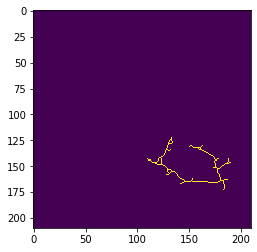

In [79]:
plt.imshow(zeros)

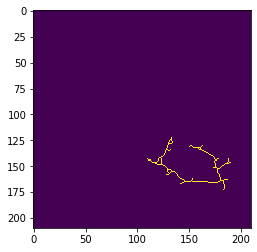

In [88]:
plt.imshow(zeros2)

In [89]:
branching_pts = branching_points(zeros)

In [90]:
branching_pts

[]

# Tortousity

In [116]:
import math
import numpy as np

def _distance_2p(x1, y1, x2, y2):
    """
    calculates the distance between two given points
    :param x1: starting x value
    :param y1: starting y value
    :param x2: ending x value
    :param y2: ending y value
    :return: the distance between [x1, y1] -> [x2, y2]
    """
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


def _curve_length(x, y):
    """
    calculates the length(distance) of the given curve, iterating from point to point.
    :param x: the x component of the curve
    :param y: the y component of the curve
    :return: the curve length
    """
    distance = 0
    for i in range(0, len(x) - 1):
        distance += _distance_2p(x[i], y[i], x[i + 1], y[i + 1])
    return distance


def _chord_length(x, y):
    """
    distance between starting and end point of the given curve
    :param x: the x component of the curve
    :param y: the y component of the curve
    :return: the chord length of the given curve
    """
    return _distance_2p(x[0], y[0], x[len(x) - 1], y[len(y) - 1])


def _detect_inflection_points(x, y):
    """
    This method detects the inflection points of a given curve y=f(x) by applying a convolution to
    the y values and checking for changes in the sign of this convolution, each sign change is
    interpreted as an inflection point.
    It will ignore the first and last 2 pixels.
    :param x: the x values of the curve
    :param y: the y values of the curve
    :return: the array position in x of the inflection points.
    """
    cf = np.convolve(y, [1, -1])
    inflection_points = []
    for iterator in range(2, len(x)):
        if np.sign(cf[iterator]) != np.sign(cf[iterator - 1]):
            inflection_points.append(iterator - 1)
    return inflection_points


def distance_measure_tortuosity(contour):
    """
    Distance measure tortuosity defined in:
    William E Hart, Michael Goldbaum, Brad Côté, Paul Kube, and Mark R Nelson. Measurement and
    classification of retinal vascular tortuosity. International journal of medical informatics,
    53(2):239–252, 1999.
    :param x: the list of x points of the curve
    :param y: the list of y points of the curve
    :return: the arc-chord tortuosity measure
    """
    x = list()
    y = list()
    print(contour)
    print(contour[0])
    for pixel in contour:
        x.append(pixel[1])
        y.append(pixel[0])
    if len(x) < 2:
        raise ValueError("Given curve must have at least 2 elements")

    return _curve_length(x, y) / _chord_length(x, y)


def distance_inflection_count_tortuosity(contour):
    """
    Calculates the tortuosity by using arc-chord ratio multiplied by the curve inflection count
    plus 1
    :param x: the list of x points of the curve
    :param y: the list of y points of the curve
    :return: the inflection count tortuosity
    """
    x = list()
    y = list()
    print(contour)
    print(contour[0])
    for pixel in contour:
        x.append(pixel[1])
        y.append(pixel[0])

    return distance_measure_tortuosity(contour) * (len(_detect_inflection_points(x, y)) + 1)

In [117]:
uni10 = contours[10]

In [118]:
uni10 = get_unique(uni10)

In [119]:
uni10[0]

[[133, 122],
 [133, 123],
 [132, 124],
 [131, 125],
 [131, 126],
 [130, 127],
 [130, 128],
 [130, 129],
 [129, 130],
 [129, 131],
 [129, 132],
 [128, 133],
 [128, 134],
 [127, 135],
 [127, 136],
 [127, 137],
 [126, 138],
 [126, 139],
 [125, 140],
 [124, 141],
 [123, 141],
 [122, 142],
 [121, 142],
 [120, 143],
 [120, 144],
 [119, 145],
 [118, 146],
 [117, 146],
 [116, 146],
 [115, 146],
 [114, 145],
 [113, 144],
 [112, 144],
 [111, 144],
 [110, 143]]

In [120]:
distance_measure_tortuosity(uni10[0])

[[133, 122], [133, 123], [132, 124], [131, 125], [131, 126], [130, 127], [130, 128], [130, 129], [129, 130], [129, 131], [129, 132], [128, 133], [128, 134], [127, 135], [127, 136], [127, 137], [126, 138], [126, 139], [125, 140], [124, 141], [123, 141], [122, 142], [121, 142], [120, 143], [120, 144], [119, 145], [118, 146], [117, 146], [116, 146], [115, 146], [114, 145], [113, 144], [112, 144], [111, 144], [110, 143]]
[133, 122]


1.3044677438595416

In [121]:
distance_inflection_count_tortuosity(uni10[0])

[[133, 122], [133, 123], [132, 124], [131, 125], [131, 126], [130, 127], [130, 128], [130, 129], [129, 130], [129, 131], [129, 132], [128, 133], [128, 134], [127, 135], [127, 136], [127, 137], [126, 138], [126, 139], [125, 140], [124, 141], [123, 141], [122, 142], [121, 142], [120, 143], [120, 144], [119, 145], [118, 146], [117, 146], [116, 146], [115, 146], [114, 145], [113, 144], [112, 144], [111, 144], [110, 143]]
[133, 122]
[[133, 122], [133, 123], [132, 124], [131, 125], [131, 126], [130, 127], [130, 128], [130, 129], [129, 130], [129, 131], [129, 132], [128, 133], [128, 134], [127, 135], [127, 136], [127, 137], [126, 138], [126, 139], [125, 140], [124, 141], [123, 141], [122, 142], [121, 142], [120, 143], [120, 144], [119, 145], [118, 146], [117, 146], [116, 146], [115, 146], [114, 145], [113, 144], [112, 144], [111, 144], [110, 143]]
[133, 122]


20.871483901752665